In [2]:
# System libraries
import re
import os
import unicodedata
import itertools

# Library for file manipulation
import pandas as pd
import numpy as np
import pandas

# Data visualization
import plotly
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt
from IPython.display import SVG

# Configuration for graphs width and layout of graphs
sns.set_theme(style='whitegrid')
palette='viridis'

# Warnings remove warnings
import warnings
warnings.filterwarnings("ignore")

# Python version
from platform import python_version
print('Python version in this Jupyter Notebook:', python_version())

# Load library versions
import watermark

# Library versions
%reload_ext watermark
%watermark -a "Library versions" --iversions

Python version in this Jupyter Notebook: 3.12.7
Author: Library versions

matplotlib: 3.9.2
re        : 2.2.1
IPython   : 8.27.0
plotly    : 5.24.1
platform  : 1.0.8
numpy     : 1.26.4
seaborn   : 0.13.2
watermark : 2.5.0
pandas    : 2.2.2



In [2]:
!pip install dataframe_image


   ---------------------------------------- 0.0/6.7 MB ? eta -:--:--
   --- ------------------------------------ 0.5/6.7 MB 4.2 MB/s eta 0:00:02
   --------- ------------------------------ 1.6/6.7 MB 4.9 MB/s eta 0:00:02
   ------------------ --------------------- 3.1/6.7 MB 5.8 MB/s eta 0:00:01
   -------------------------- ------------- 4.5/6.7 MB 6.0 MB/s eta 0:00:01
   ---------------------------------- ----- 5.8/6.7 MB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 6.7/6.7 MB 5.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/35.6 MB ? eta -:--:--
    --------------------------------------- 0.8/35.6 MB 4.8 MB/s eta 0:00:08
   -- ------------------------------------- 2.6/35.6 MB 5.8 MB/s eta 0:00:06
   ---- ----------------------------------- 3.9/35.6 MB 6.2 MB/s eta 0:00:06
   ----- ---------------------------------- 5.2/35.6 MB 6.1 MB/s eta 0:00:05
   ------- -------------------------------- 6.6/35.6 MB 6.3 MB/s eta 0:00:05
   --------- -------

# Step 1: Data Gathering 


In [3]:
df = pd.read_csv("C:/Users/user/Downloads/Customer-Churn-Dataset.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
# Viewing the first 5 data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Viewing the first 5 data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Viewing the last 5 data
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


# Step-2 : Exploratory Data Analysis

In [6]:
# Rows and columns
df.shape

(7043, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df.shape

(7043, 21)

In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print("")

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender
['Female' 'Male']

SeniorCitizen
[0 1]

Partner
['Yes' 'No']

Dependents
['No' 'Yes']

tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

PhoneService
['No' 'Yes']

MultipleLines
['No phone service' 'No' 'Yes']

InternetService
['DSL' 'Fiber optic' 'No']

OnlineSecurity
['No' 'Yes' 'No internet service']

OnlineBackup
['Yes' 'No' 'No internet service']

DeviceProtection
['No' 'Yes' 'No internet service']

TechSupport
['No' 'Yes' 'No internet service']

StreamingTV
['No' 'Yes' 'No internet service']

StreamingMovies
['No' 'Yes' 'No internet service']

Contract
['Month-to-month' 'One year' 'Two year']

PaperlessBilling
['Yes' 'No']

PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'

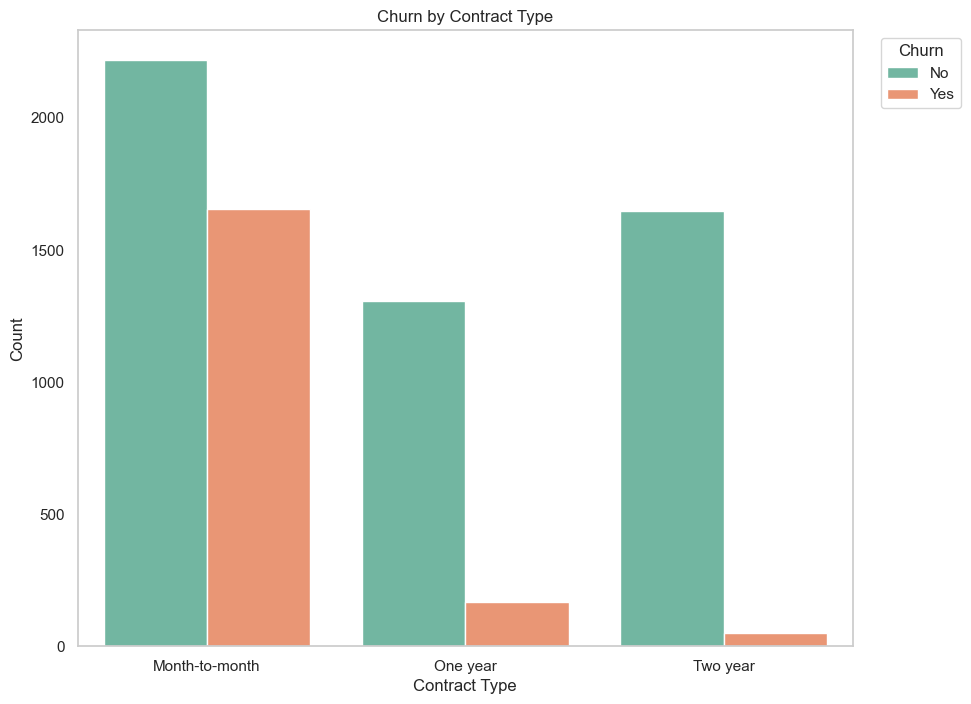

In [12]:
# Churn count by contract type
plt.figure(figsize=(10, 8))
sns.countplot(x='Contract', hue='Churn', data= df, palette='Set2')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(False)
plt.show()

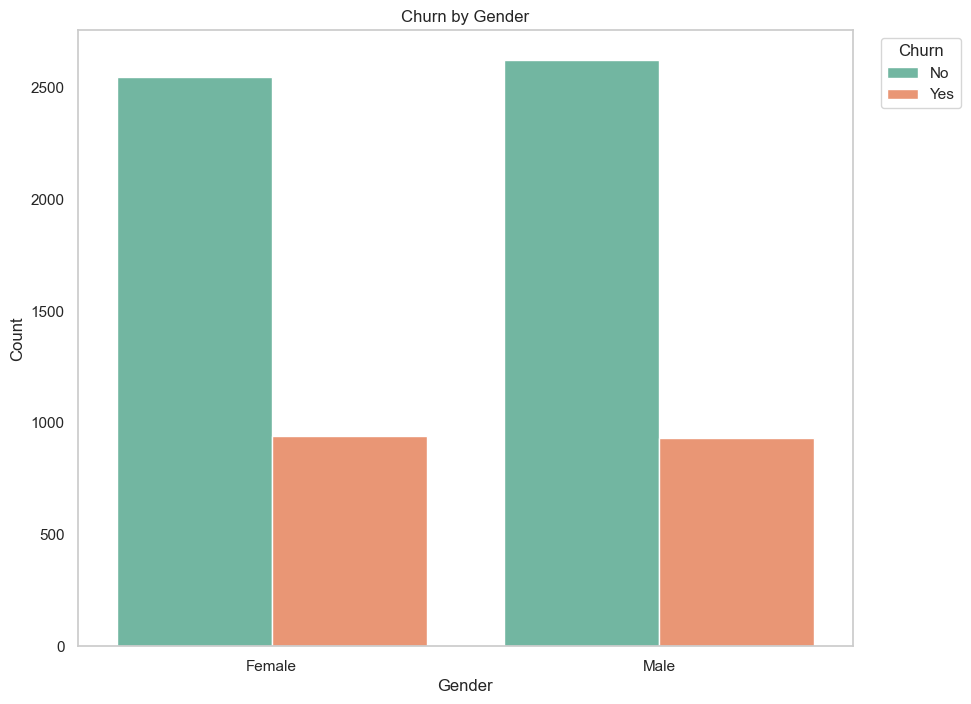

In [6]:
# Churn count by gender
plt.figure(figsize=(10, 8))
sns.countplot(x='gender', hue='Churn', data=df, palette='Set2')
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(False)
plt.show()


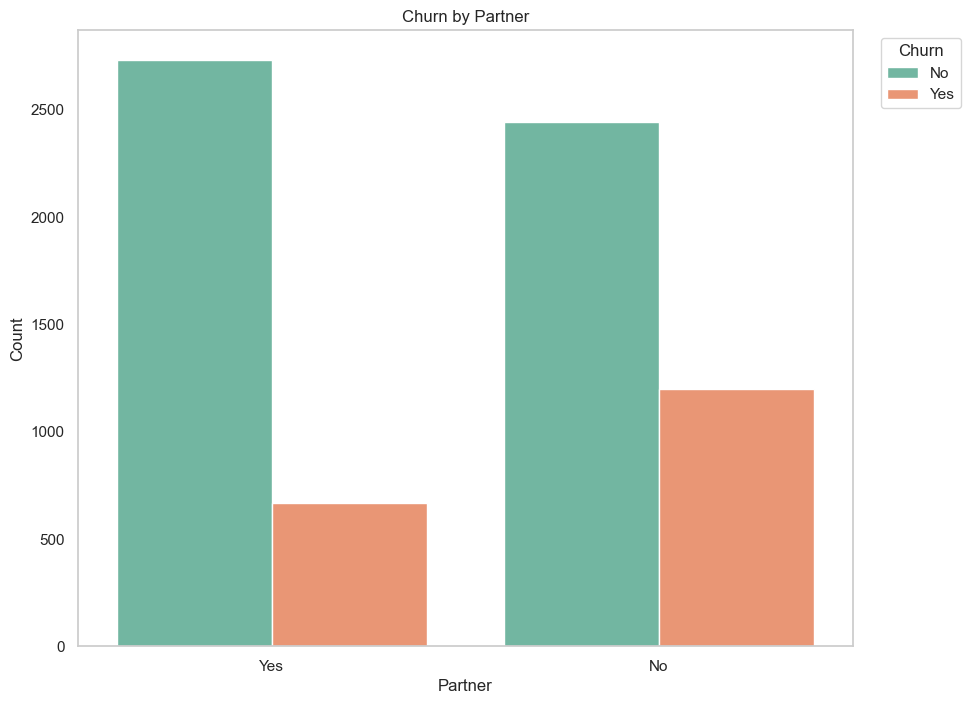

In [8]:
# Churn count by partner
plt.figure(figsize=(10, 8))
sns.countplot(x='Partner', hue='Churn', data=df, palette='Set2')
plt.title('Churn by Partner')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(False)
plt.show()


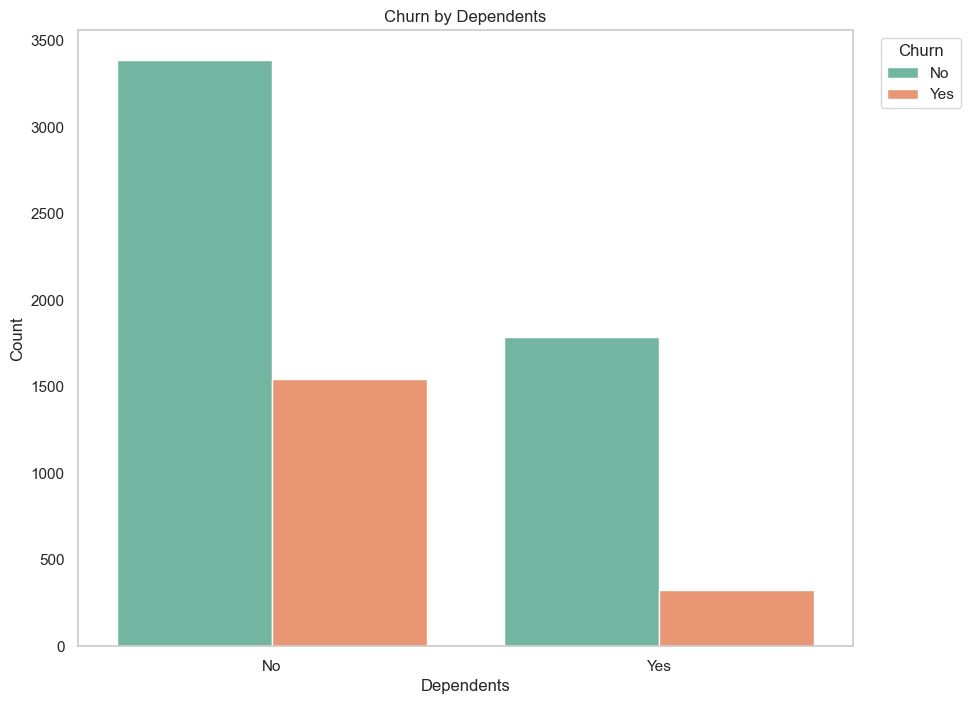

In [13]:
# Churn count by dependents
plt.figure(figsize=(10, 8))
sns.countplot(x='Dependents', hue='Churn', data=df, palette='Set2')
plt.title('Churn by Dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(False)
plt.show()


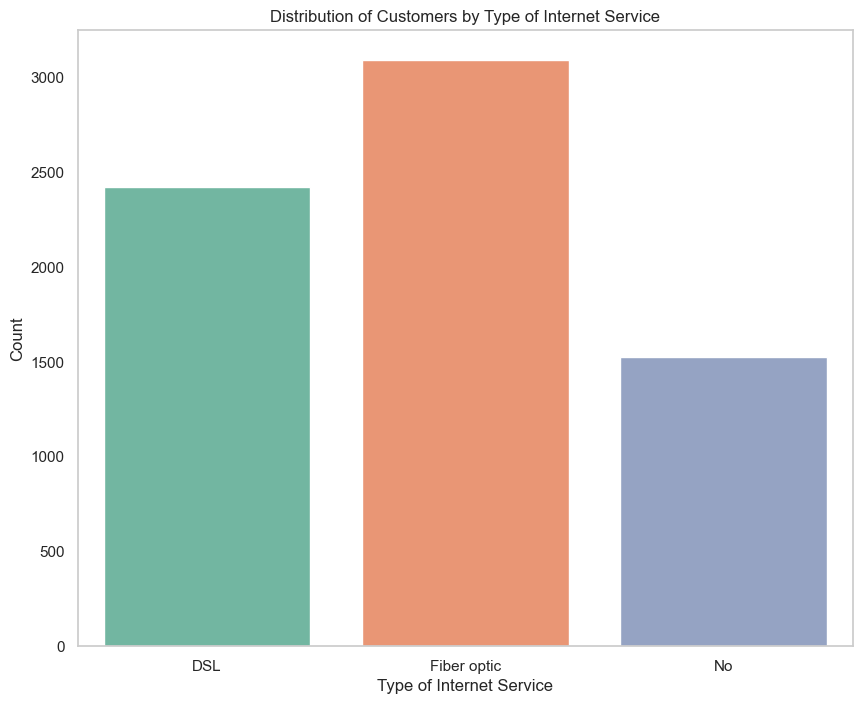

In [13]:
# Distribution of customers by type of internet service
plt.figure(figsize=(10, 8))
sns.countplot(x='InternetService', data=df, palette='Set2')
plt.title('Distribution of Customers by Type of Internet Service')
plt.xlabel('Type of Internet Service')
plt.ylabel('Count')
plt.grid(False)
plt.show()

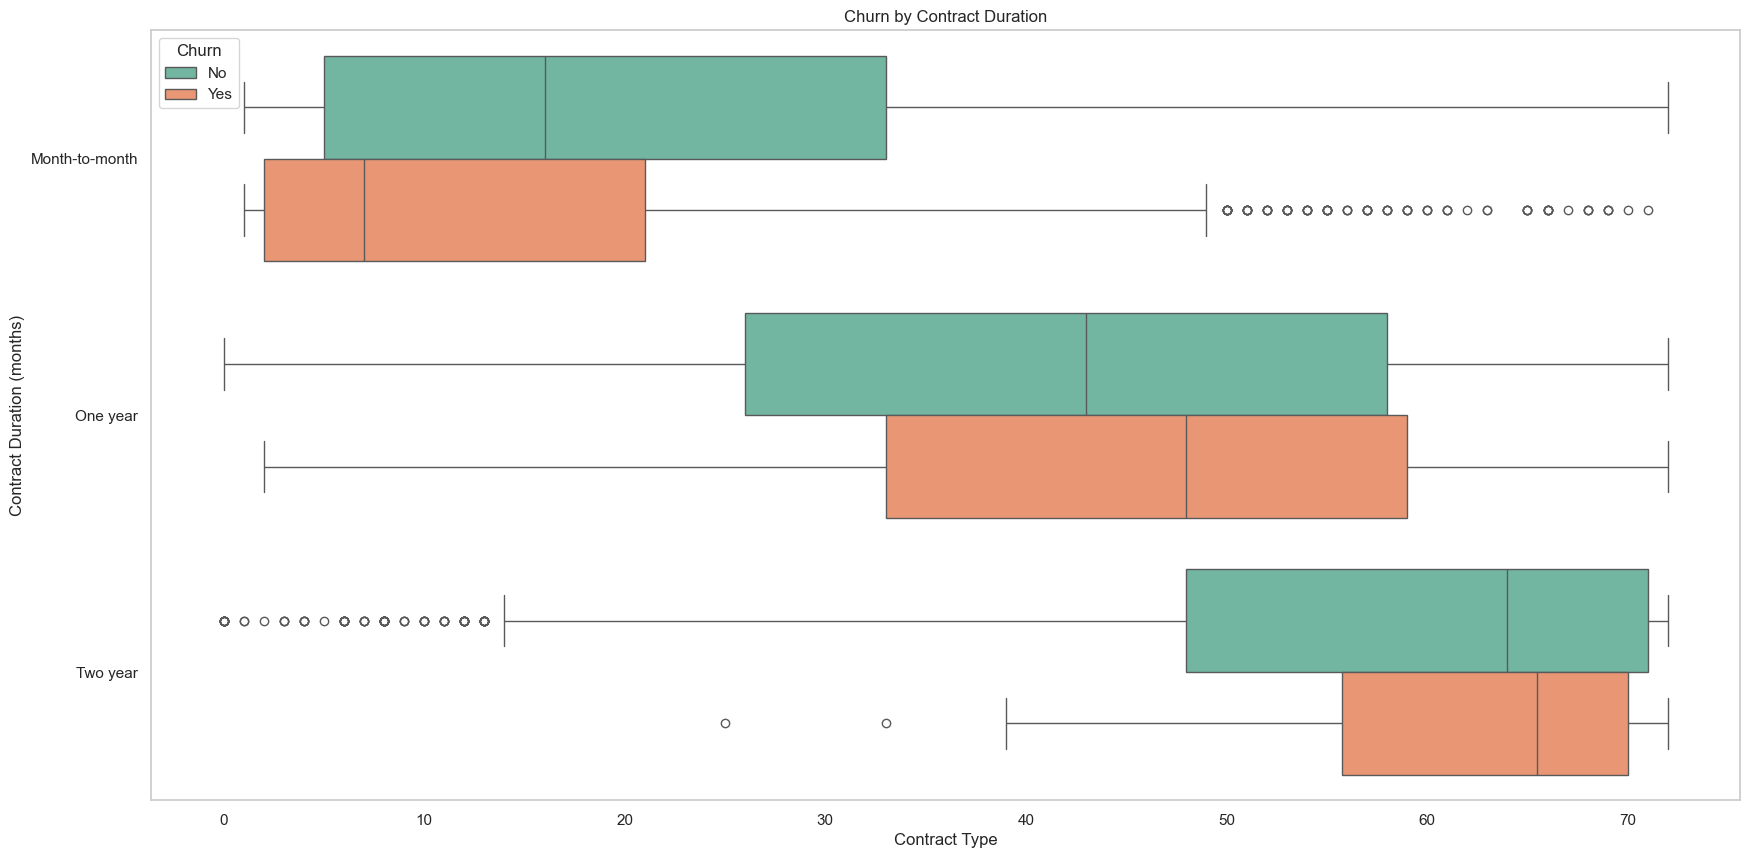

In [14]:
# Churn distribution by contract duration
plt.figure(figsize=(20.5, 10))

sns.boxplot(x='tenure', y='Contract', hue='Churn', data=df, palette='Set2')
plt.title('Churn by Contract Duration')
plt.xlabel('Contract Type')
plt.ylabel('Contract Duration (months)')
plt.grid("off")
plt.grid(False)
plt.show()


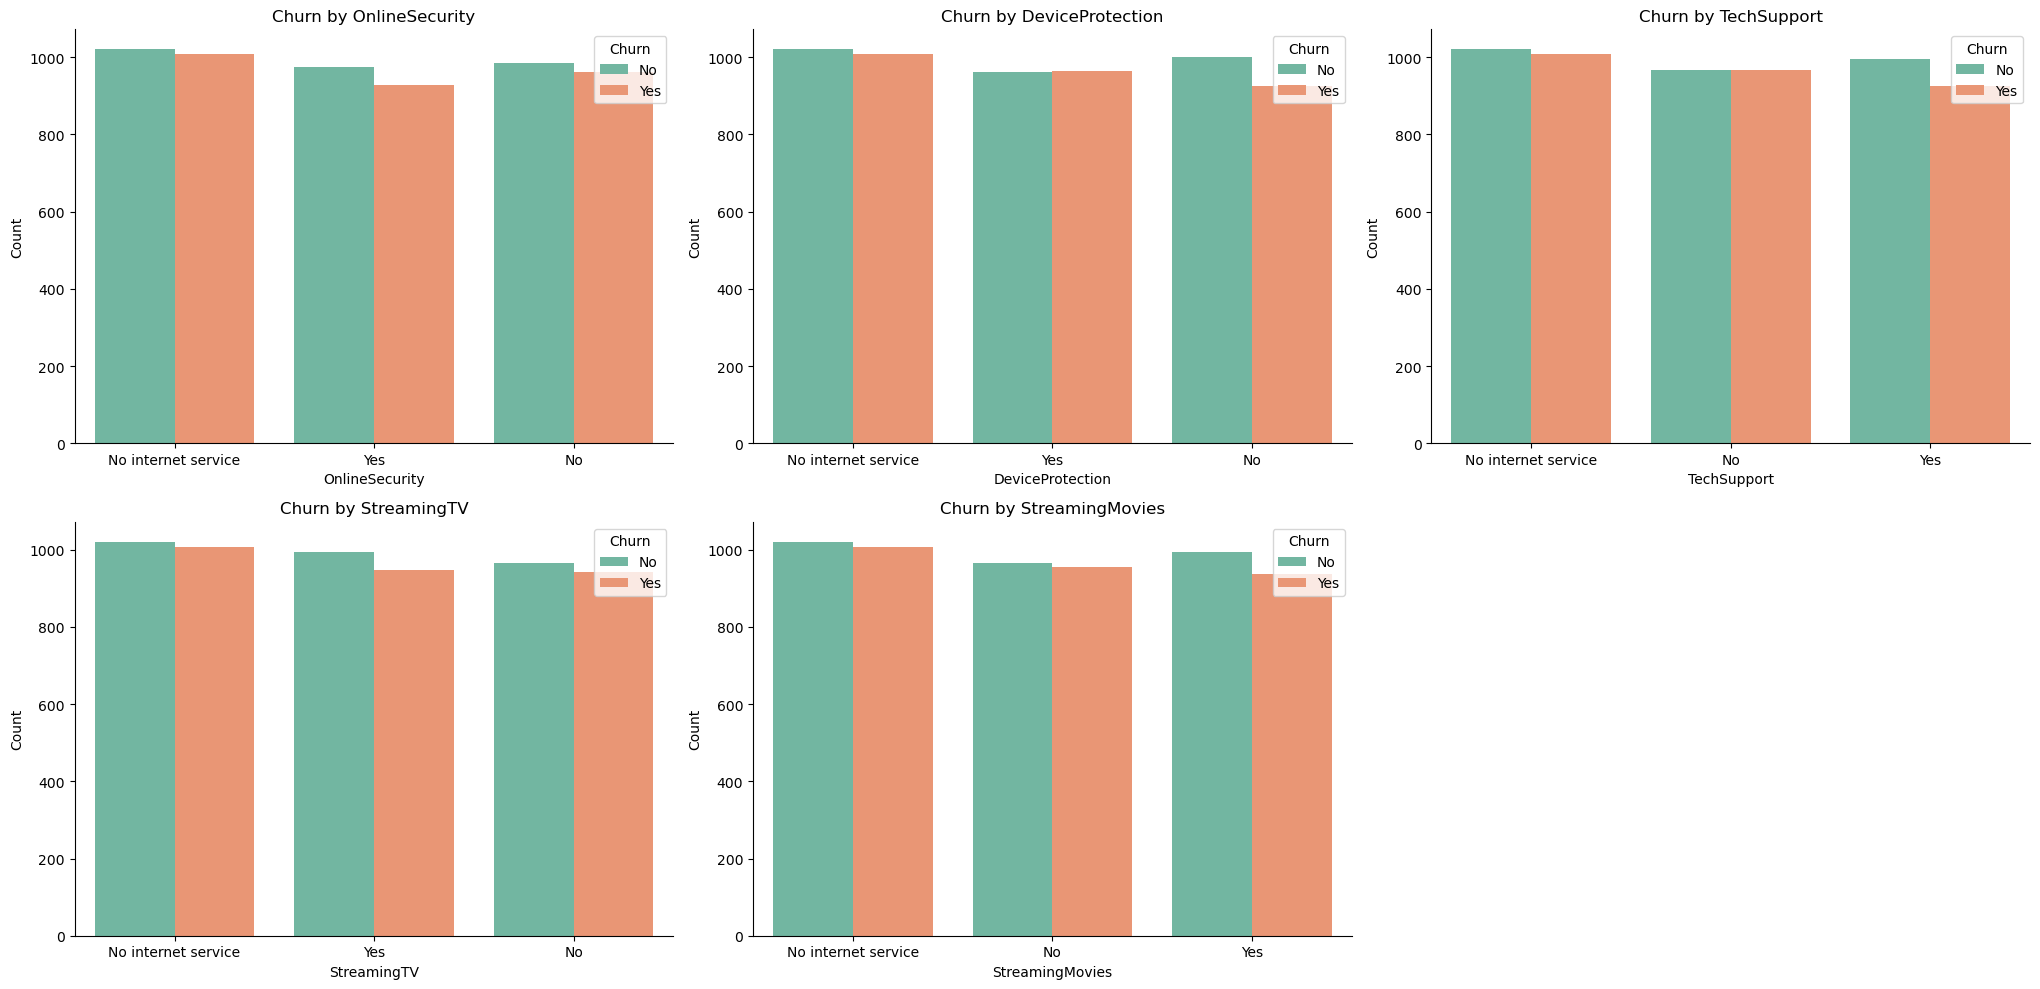

In [29]:
# Churn count by additional services
additional_services = ['OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

plt.figure(figsize=(20.5, 10))
for i, service in enumerate(additional_services, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=service, hue='Churn', data=df, palette='Set2')
    plt.title(f'Churn by {service}')
    plt.xlabel(service)
    plt.ylabel('Count')
    sns.despine() # Remove background lines
    plt.tight_layout()
plt.show()

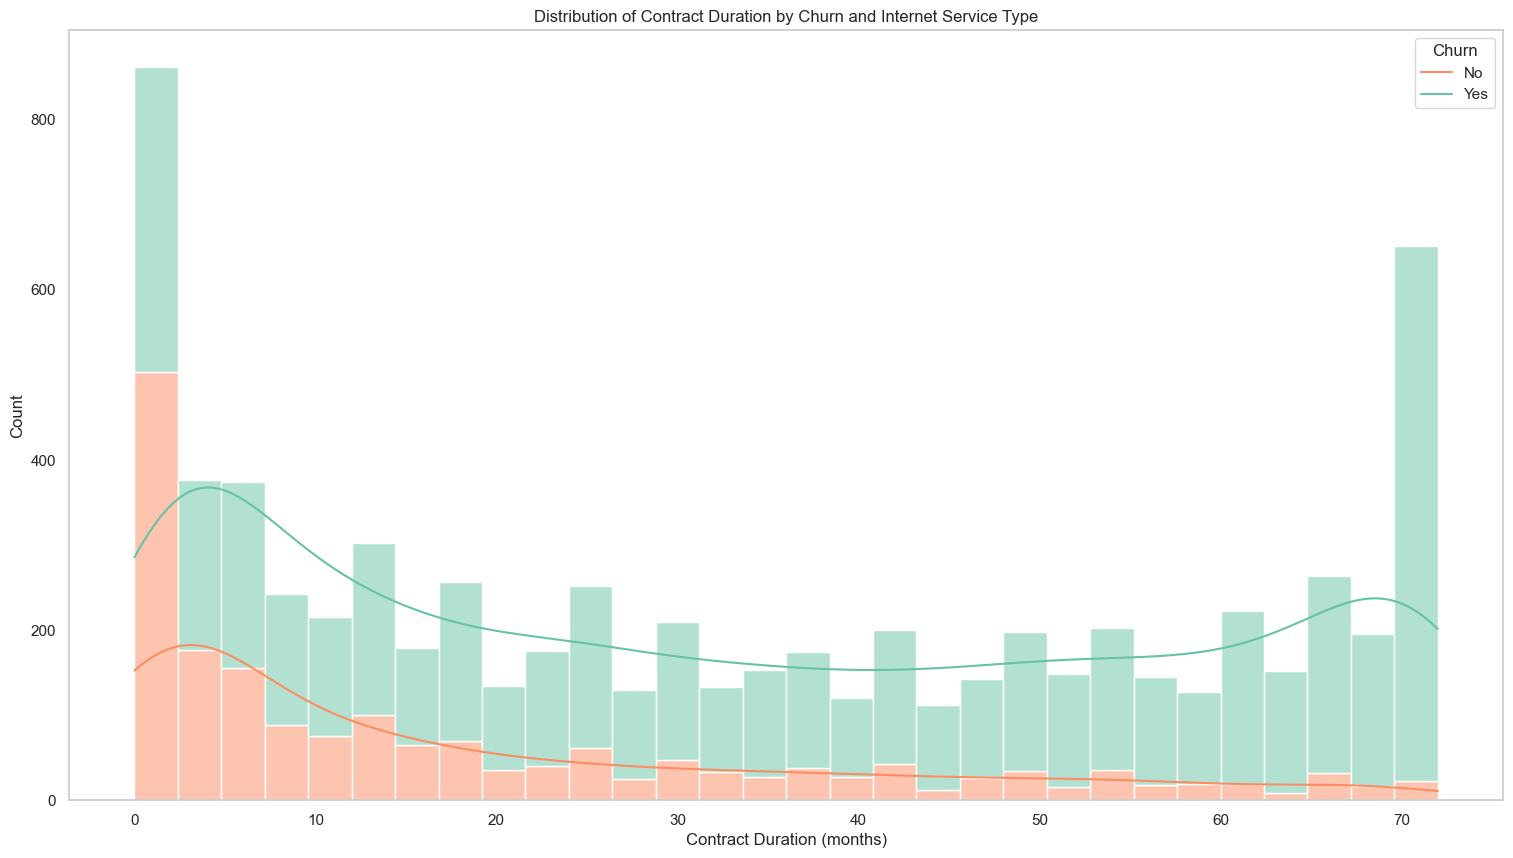

In [25]:
plt.figure(figsize=(18.5, 10))
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, multiple='stack', palette='Set2', bins=30)
plt.title('Distribution of Contract Duration by Churn and Internet Service Type')
plt.xlabel('Contract Duration (months)')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.grid(False)
plt.show()


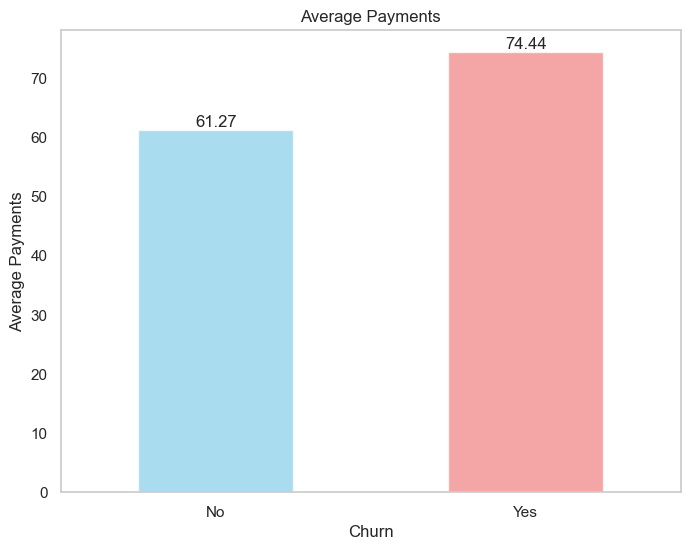

In [15]:
# Calculating the average monthly charges by churn
media_pagamentos = df.groupby('Churn')['MonthlyCharges'].mean()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
media_pagamentos.plot(kind='bar', color=['skyblue', 'lightcoral'], alpha=0.7)
# Customizing the chart
plt.title('Average Payments')
plt.xlabel('Churn')
plt.ylabel('Average Payments')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Displaying the average values on the bars
for i in range(len(media_pagamentos)):
    plt.text(i, media_pagamentos.iloc[i], f"{media_pagamentos.iloc[i]:.2f}", ha='center', va='bottom')
plt.grid(False)
plt.show()



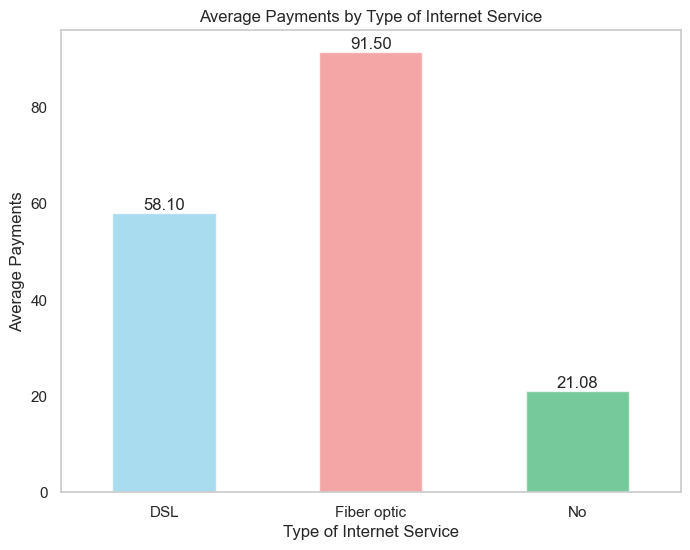

In [27]:
# Calculating the average monthly charges by type of Internet service
media_pagamento_por_internet = df.groupby('InternetService')['MonthlyCharges'].mean()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
media_pagamento_por_internet.plot(kind='bar', color=['skyblue', 'lightcoral', 'mediumseagreen'], alpha=0.7)

# Customizing the chart
plt.title('Average Payments by Type of Internet Service')
plt.xlabel('Type of Internet Service')
plt.ylabel('Average Payments')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Displaying the average values on the bars
for i in range(len(media_pagamento_por_internet)):
    plt.text(i, media_pagamento_por_internet.iloc[i], 
             f"{media_pagamento_por_internet.iloc[i]:.2f}", 
             ha='center', 
             va='bottom')

plt.grid(False)
plt.show()


<Figure size 2500x1000 with 0 Axes>

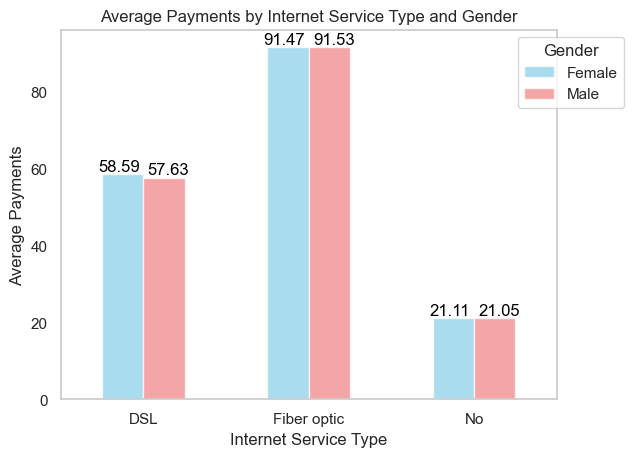

In [16]:
# Calculating the average monthly charges by Internet service type and gender
media_pagamento_por_internet_genero = df.groupby(['InternetService', 'gender'])['MonthlyCharges'].mean().unstack()

# Plotting the bar chart
plt.figure(figsize=(25, 10))
media_pagamento_por_internet_genero.plot(kind='bar', color=['skyblue', 'lightcoral'], alpha=0.7)

# Customizing the chart
plt.title('Average Payments by Internet Service Type and Gender')
plt.xlabel('Internet Service Type')
plt.ylabel('Average Payments')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Gender', loc = 'upper right', bbox_to_anchor=(1.15, 1))

# Displaying the average values ​​on the bars
for i in range(len(media_pagamento_por_internet_genero)):
    plt.text(i-0.15, media_pagamento_por_internet_genero.iloc[i, 0], 
             f"{media_pagamento_por_internet_genero.iloc[i, 0]:.2f}", ha='center', va='bottom', color='black')
    plt.text(i+0.15, media_pagamento_por_internet_genero.iloc[i, 1], 
             f"{media_pagamento_por_internet_genero.iloc[i, 1]:.2f}", ha='center', va='bottom', color='black')

plt.grid(False)
plt.show()

             

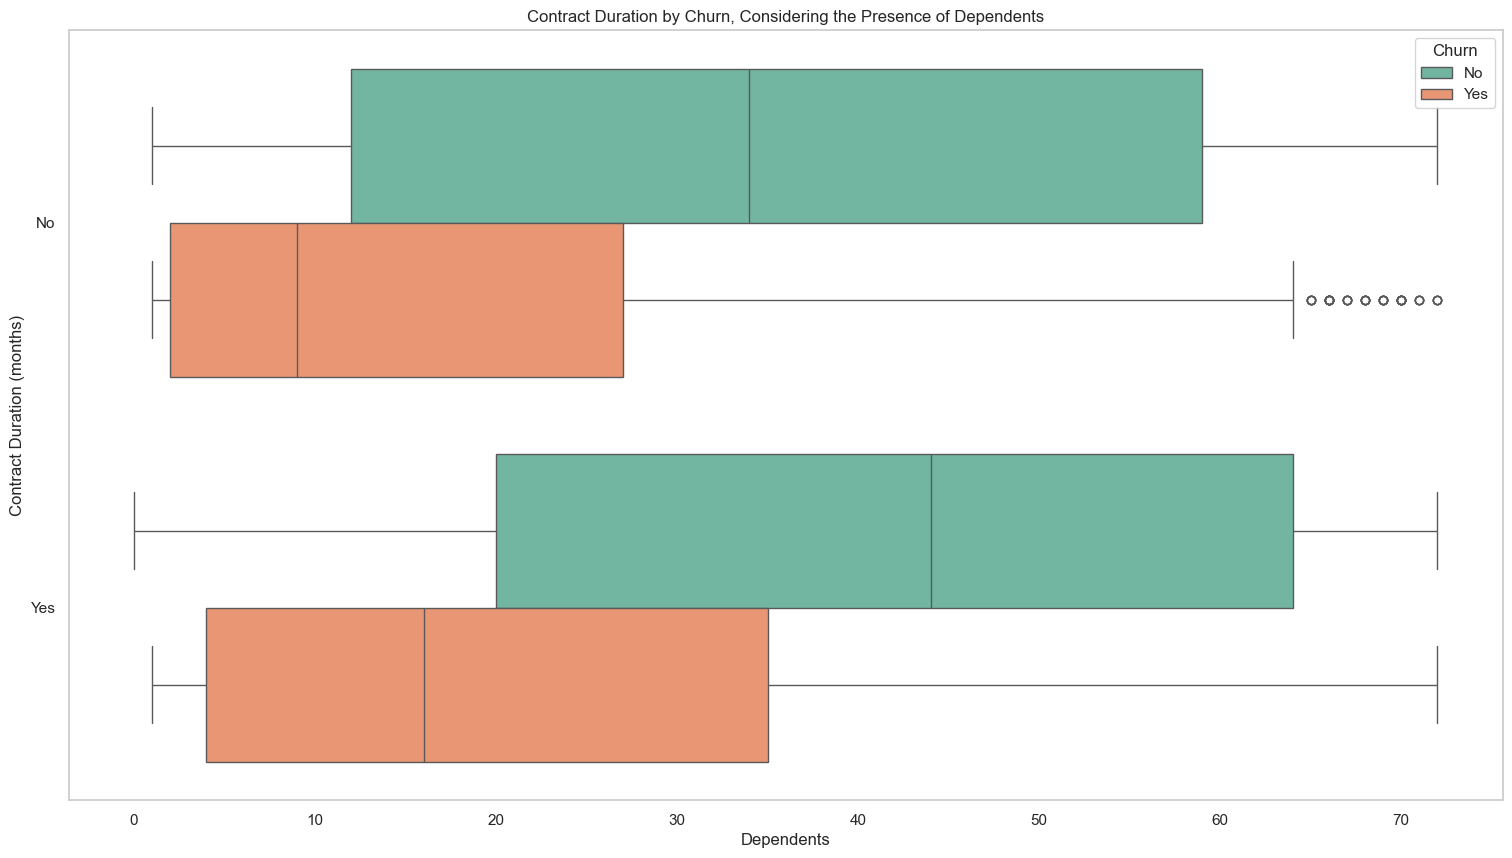

In [10]:
plt.figure(figsize=(18.5, 10)) 
sns.boxplot(data=df, x='tenure', y='Dependents', hue='Churn', palette='Set2')
plt.title('Contract Duration by Churn, Considering the Presence of Dependents')
plt.xlabel('Dependents')
plt.ylabel('Contract Duration (months)')
plt.legend(title='Churn', loc='upper right')
plt.grid(False)
plt.show()

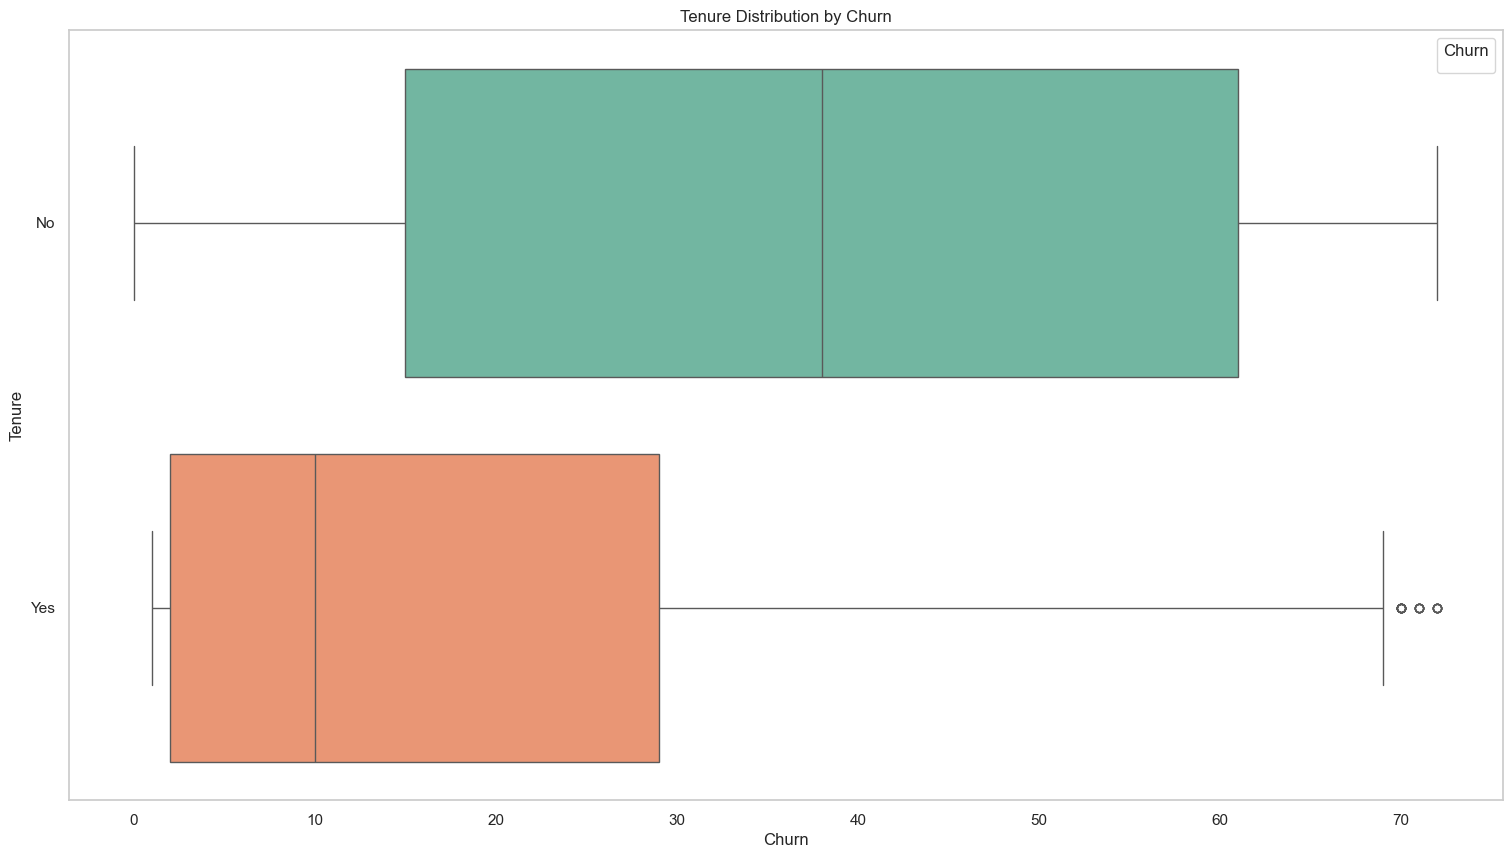

In [17]:
plt.figure(figsize=(18.5, 10)) 
sns.boxplot(data=df, x='tenure', y='Churn', hue='Churn', palette='Set2')
plt.title('Tenure Distribution by Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.legend(title='Churn', loc='upper right')
plt.grid(False)
plt.show()

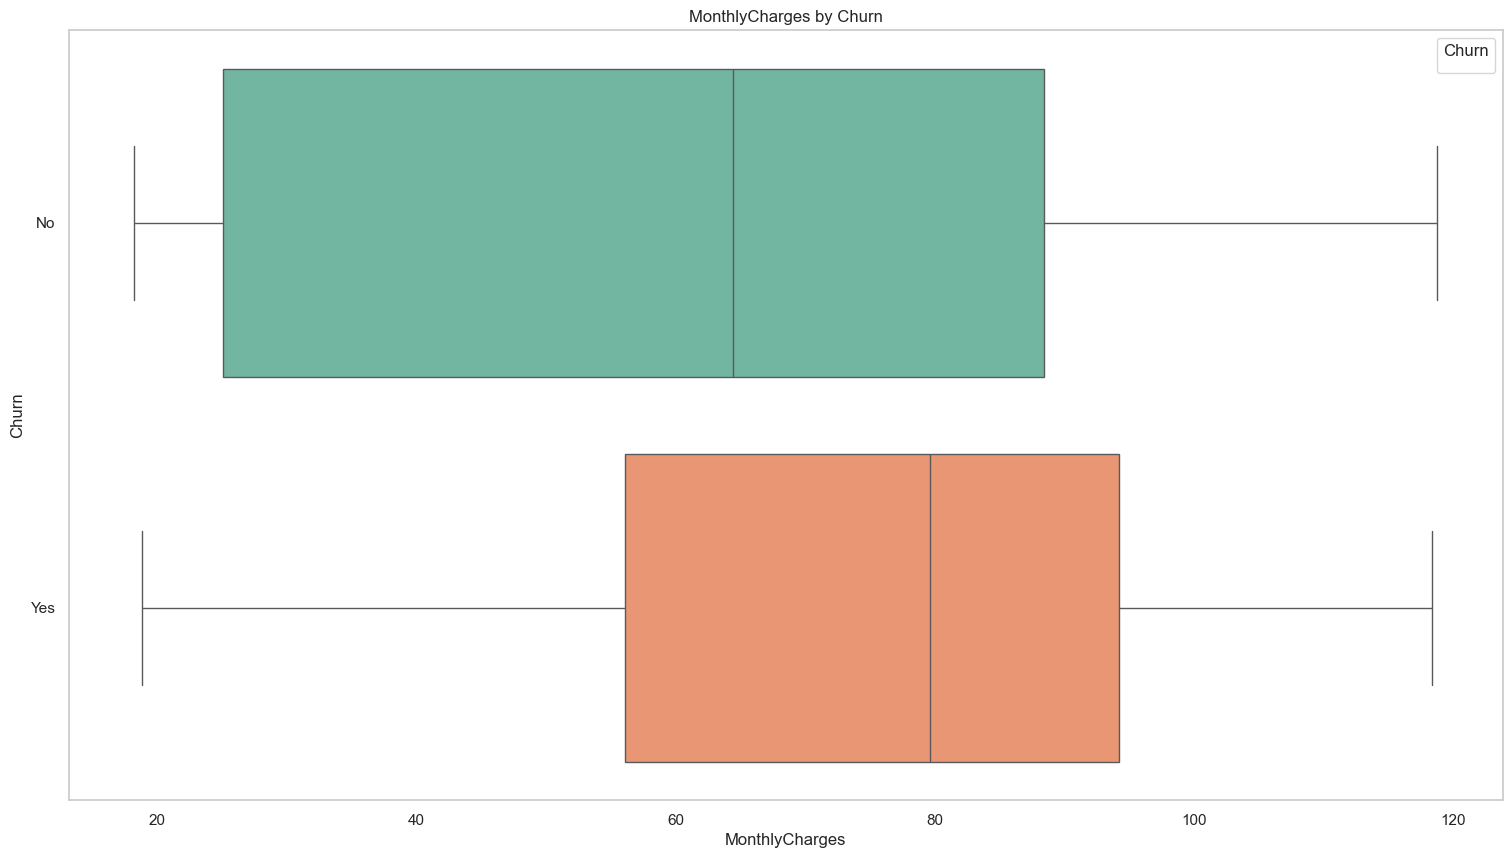

In [13]:
plt.figure(figsize=(18.5, 10)) 
sns.boxplot(data=df, x='MonthlyCharges', y='Churn', hue='Churn', palette='Set2')
plt.title('MonthlyCharges by Churn')
plt.xlabel('MonthlyCharges')
plt.ylabel('Churn')
plt.legend(title='Churn', loc='upper right')
plt.grid(False)
plt.show()

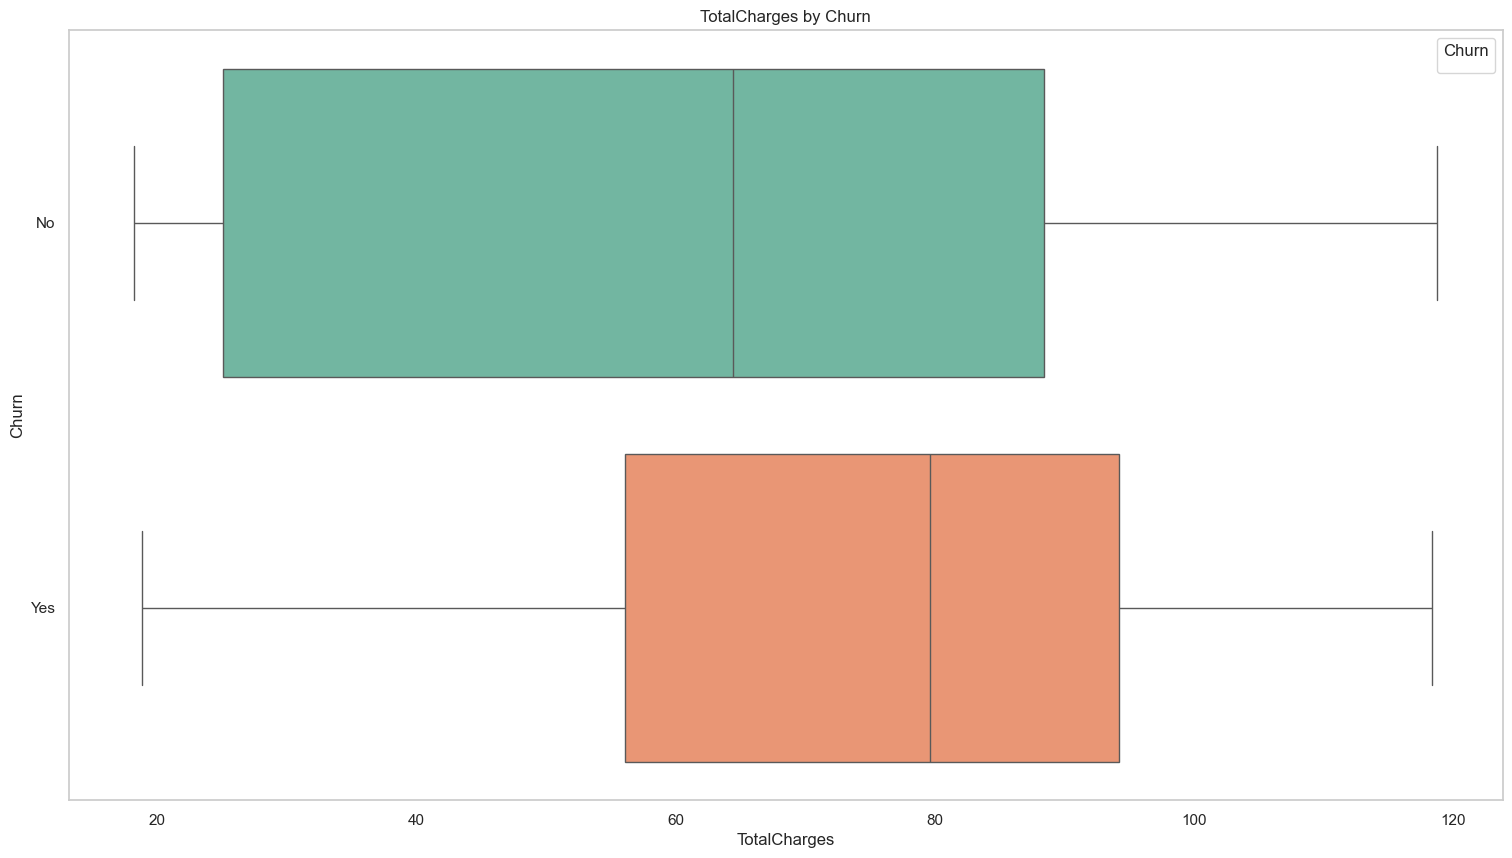

In [18]:
plt.figure(figsize=(18.5, 10)) 
sns.boxplot(data=df, x='MonthlyCharges', y='Churn', hue='Churn', palette='Set2')
plt.title('TotalCharges by Churn')
plt.xlabel('TotalCharges')
plt.ylabel('Churn')
plt.legend(title='Churn', loc='upper right')
plt.grid(False)
plt.show()

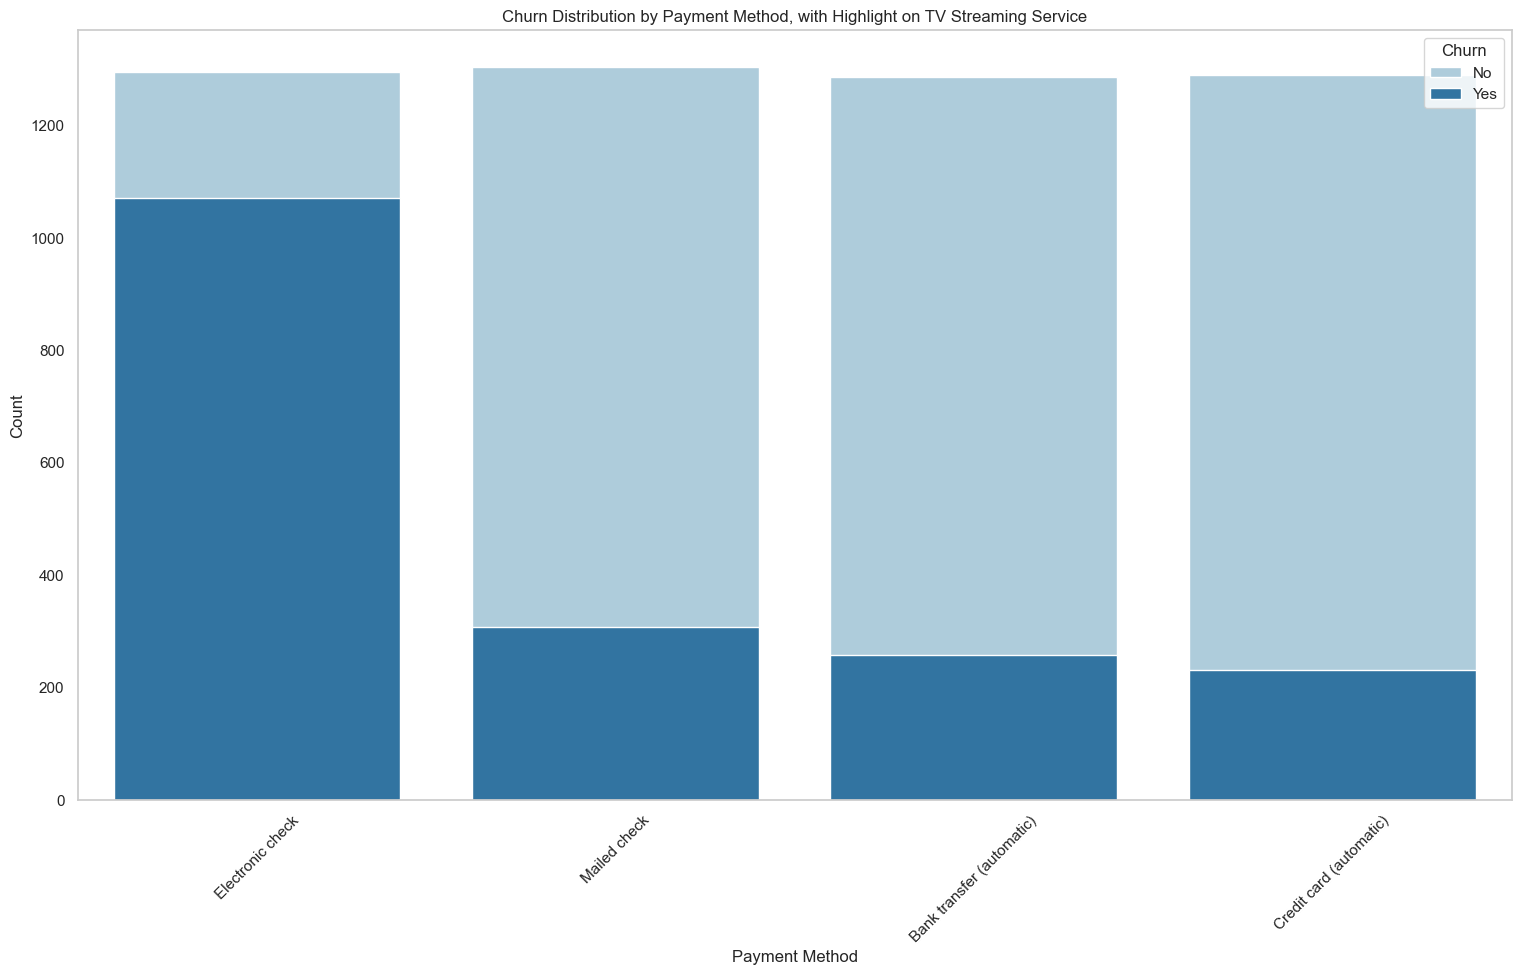

In [19]:
plt.figure(figsize=(18.5, 10))

# Churn count by payment method
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='Paired', hue_order=['No', 'Yes'], dodge=False)

plt.title('Churn Distribution by Payment Method, with Highlight on TV Streaming Service')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.grid(False)
plt.show()

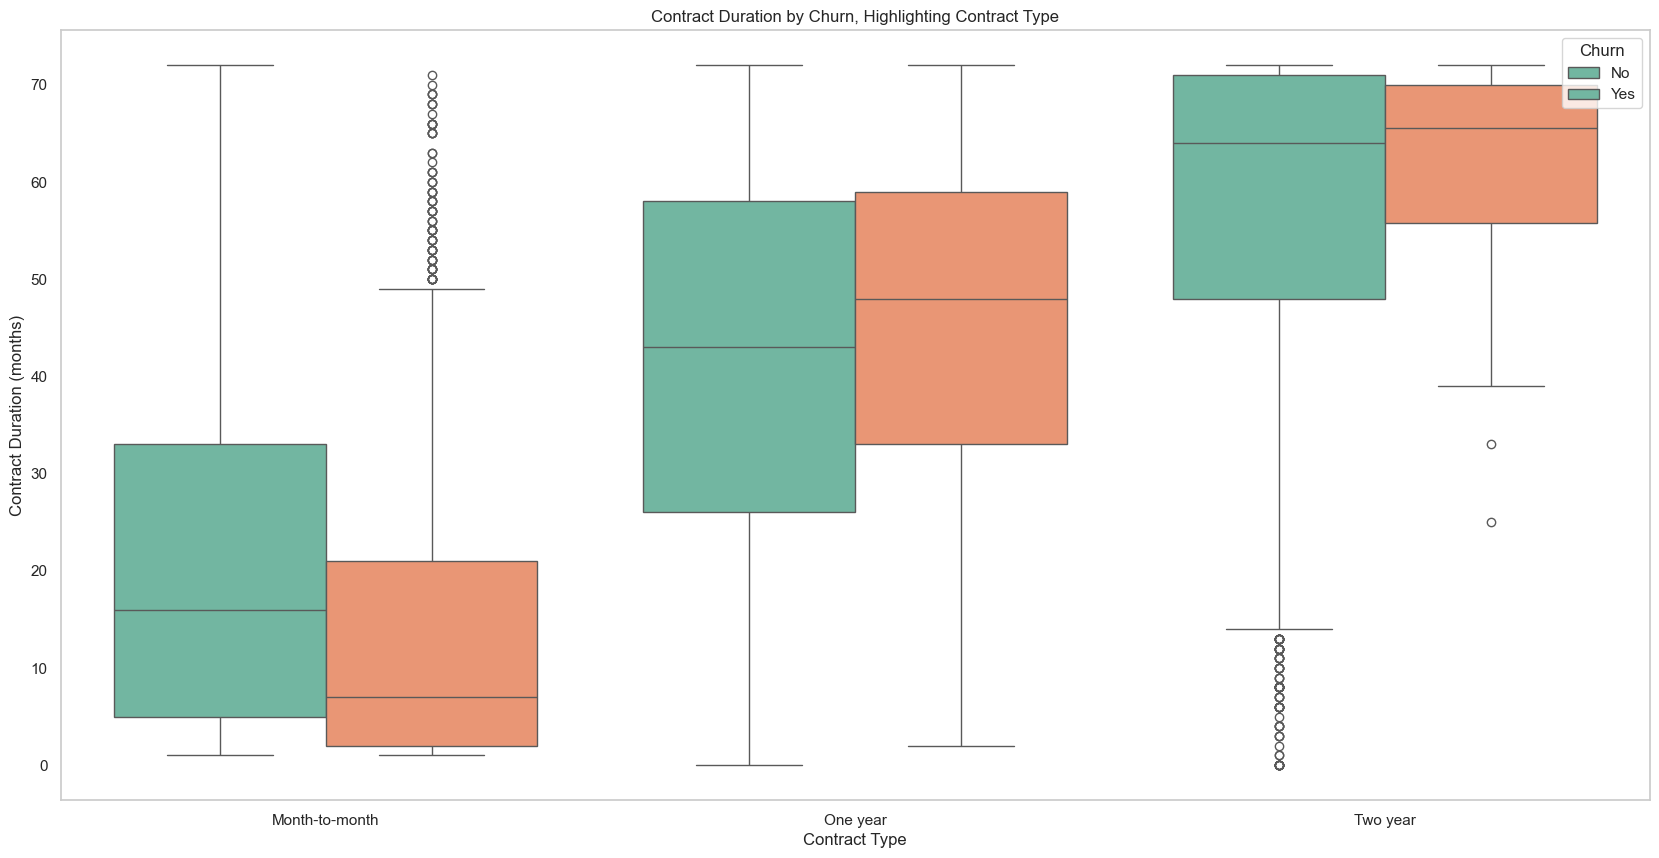

In [20]:
plt.figure(figsize=(20.5, 10))

# Boxplot of contract duration by churn and contract type
sns.boxplot(data=df, x='Contract', y='tenure', hue='Churn', palette='Set2')

# Customizing the chart
plt.title('Contract Duration by Churn, Highlighting Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Contract Duration (months)')
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.grid(False)
plt.show()

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

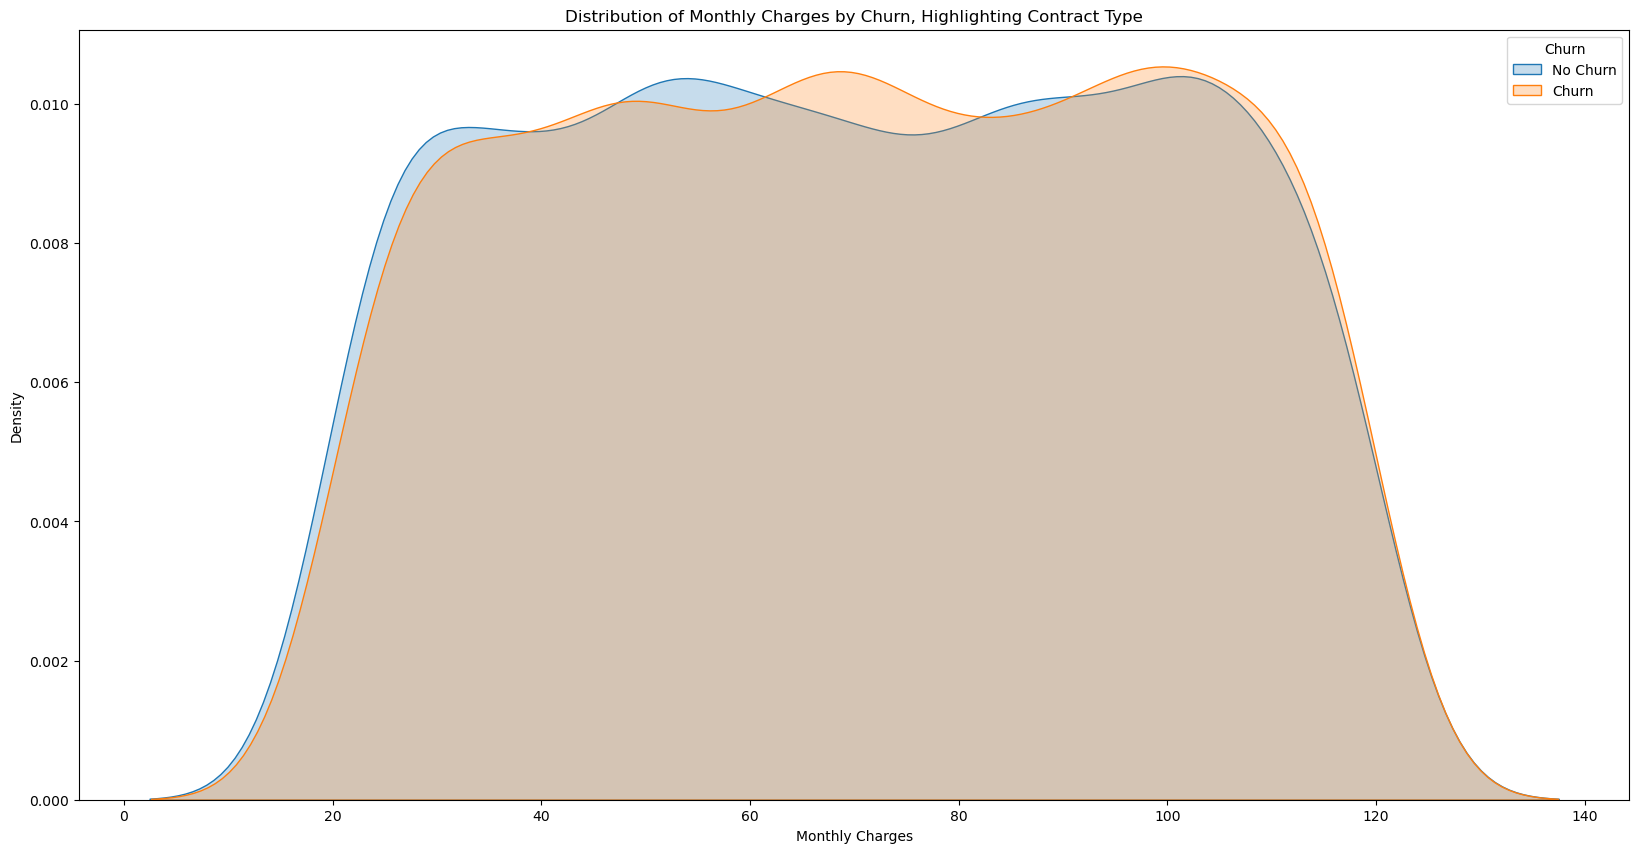

In [52]:
plt.figure(figsize=(20, 10))

# Density chart of monthly charges by churn and contract type
sns.kdeplot(data=df[df['Churn'] == 'No']['MonthlyCharges'], label='No Churn', shade=True)
sns.kdeplot(data=df[df['Churn'] == 'Yes']['MonthlyCharges'], label='Churn', shade=True)

# Customizing the chart
plt.title('Distribution of Monthly Charges by Churn, Highlighting Contract Type')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.legend(title='Churn')
plt.grid(False)
plt.show()

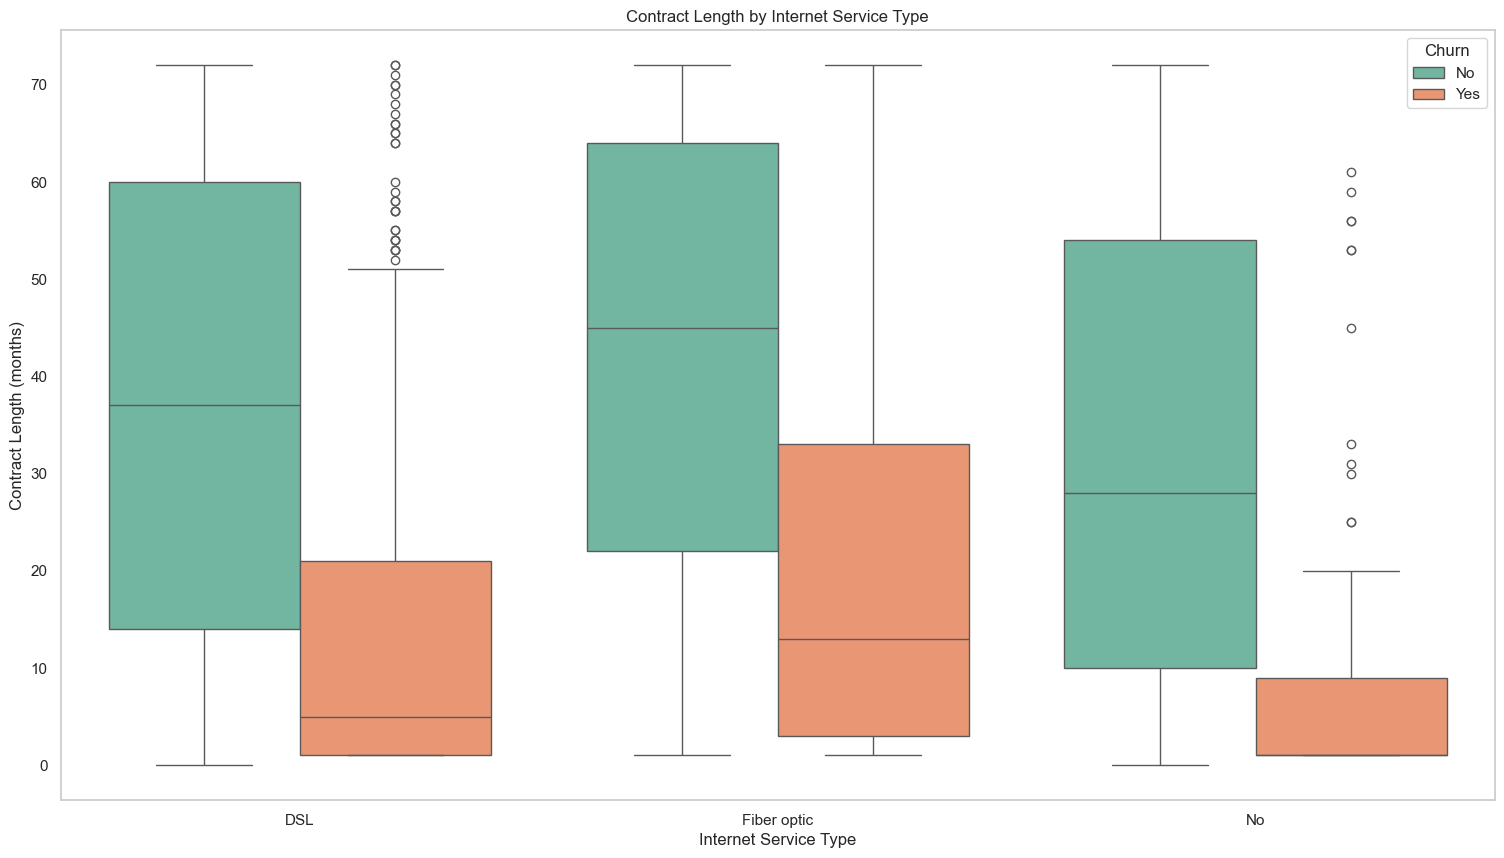

In [21]:
plt.figure(figsize=(18.5, 10))

# Boxplot of contract length by internet service type, colored by churn
sns.boxplot(data=df, x='InternetService', y='tenure', hue='Churn', palette='Set2')

# Customizing the chart
plt.title('Contract Length by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Contract Length (months)')
plt.legend(title='Churn', loc='upper right')
plt.grid(False)
plt.show()

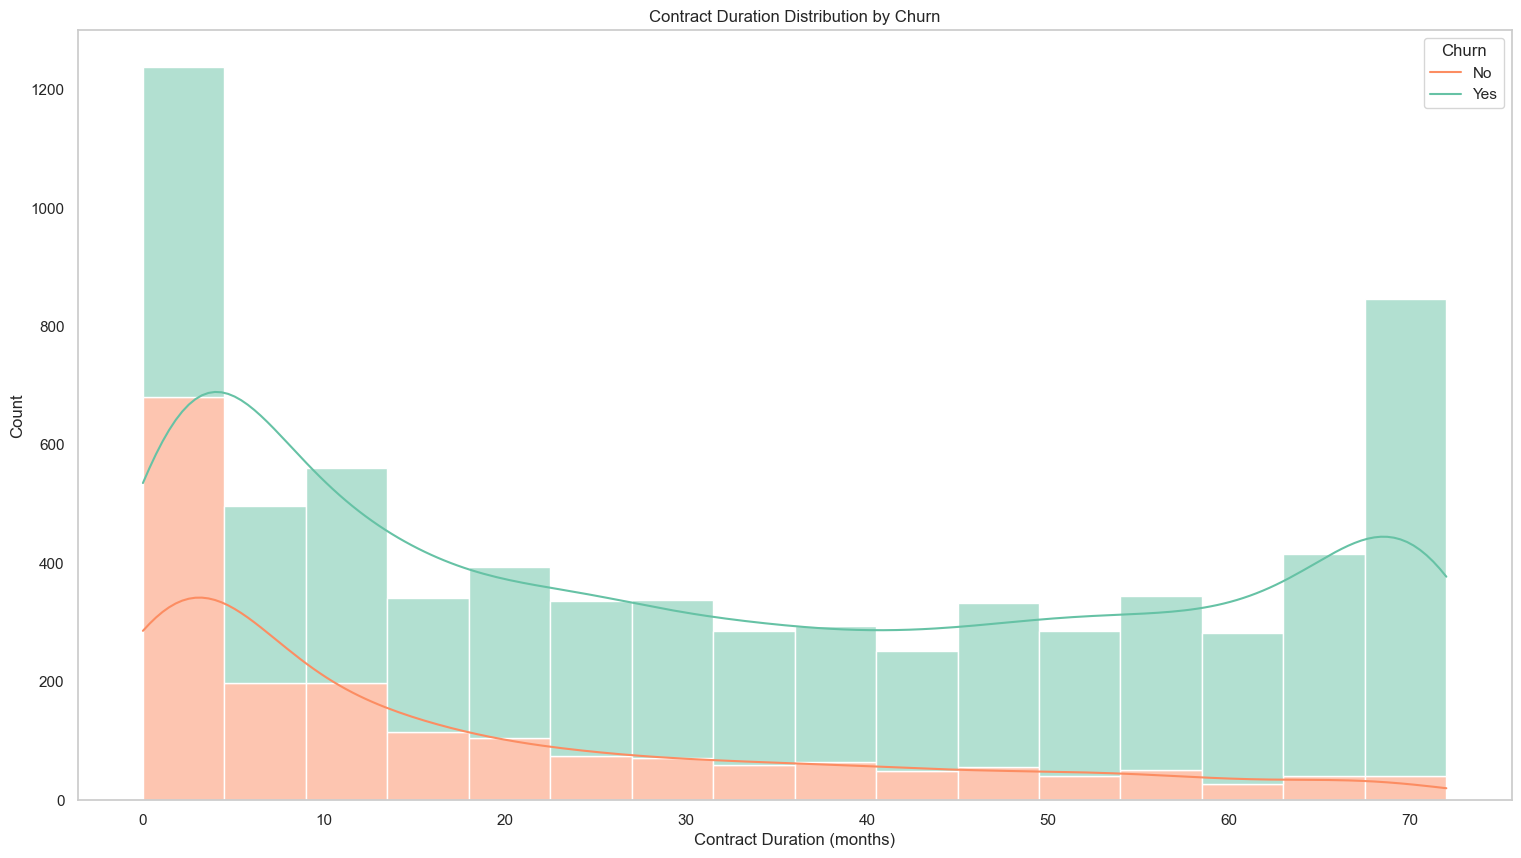

In [22]:
plt.figure(figsize=(18.5, 10))

# Histogram of contract duration for churned and non-churned customers
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', palette='Set2', kde=True)

# Customizing the chart
plt.title('Contract Duration Distribution by Churn')
plt.xlabel('Contract Duration (months)')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.grid(False)
plt.show()


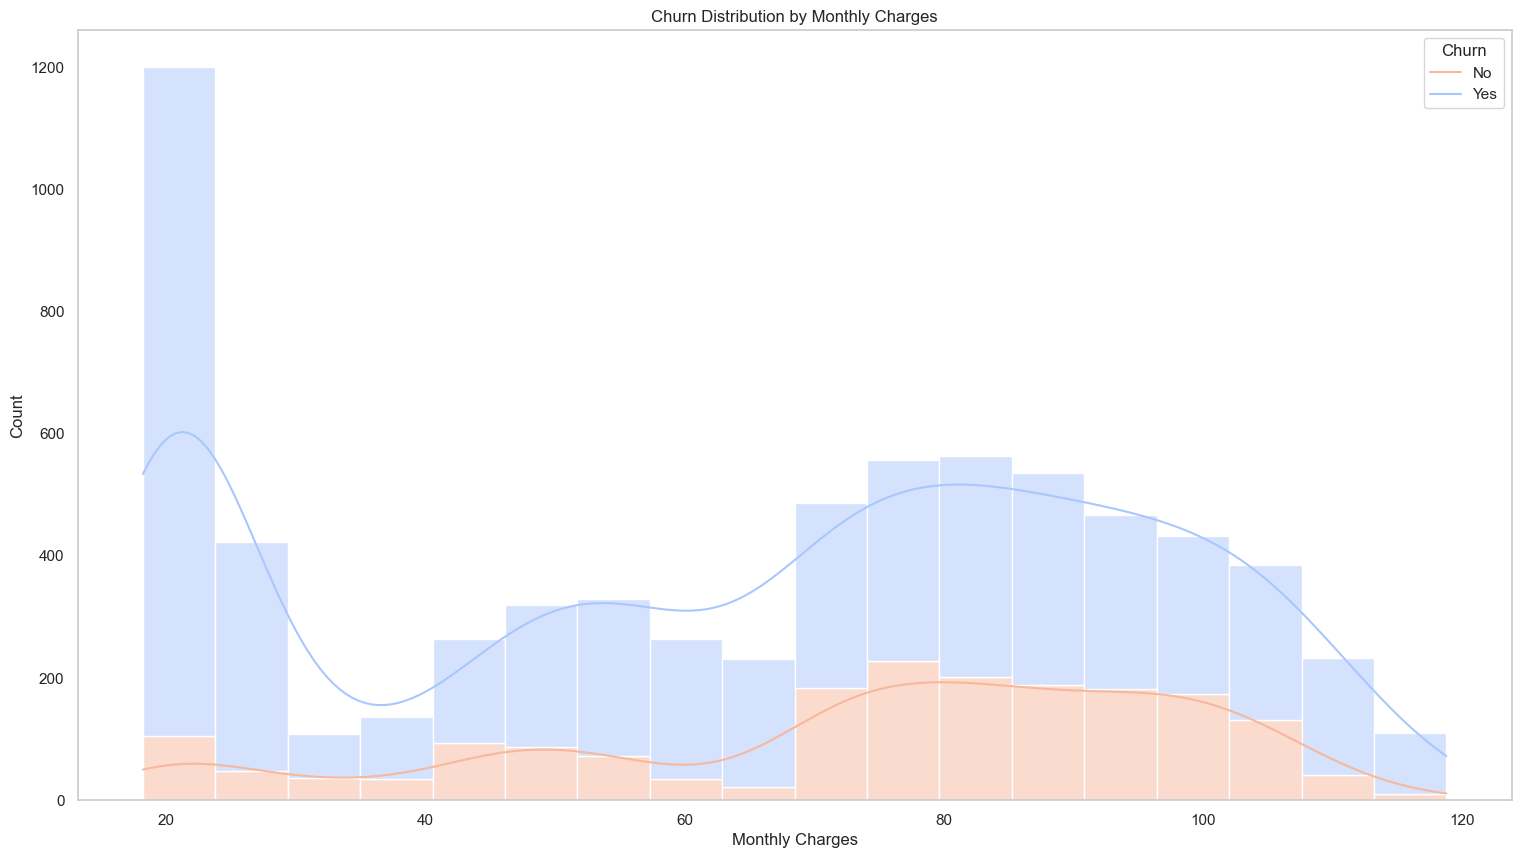

In [20]:
plt.figure(figsize=(18.5, 10))

# Histogram of monthly charges distribution by churn
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', palette='coolwarm', kde=True)

# Customizing the chart
plt.title('Churn Distribution by Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.grid(False)
plt.show()

# Step3 - Data cleaning

In [23]:
# Deleting columns
df.drop(['customerID', 'TotalCharges'],axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [24]:
# Checking for blank data
blank_data = df.isnull().sum()
print("Blank data by column:")
print(blank_data)

Blank data by column:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
dtype: int64


In [25]:
# Checking for NaN data
nan_data_by_column = df.isna().sum()
nan_total_data = df.isna().sum().sum()

print("NaN data by column:")
print(nan_data_by_column)
print("\nTotal NaN data in DataFrame:", nan_total_data)

NaN data by column:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
dtype: int64

Total NaN data in DataFrame: 0


In [26]:
# Checking for missing data
missing_data = df.isnull()

print("Missing data by column:")
missing_data

Missing data by column:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [37]:
# Print the total number of missing values in the entire DataFrame.
total_missing = df.isnull().sum().sum() 
print("Total data missing in DataFrame:", total_missing)

Total data missing in DataFrame: 0


# Step 4 - Feature engineering

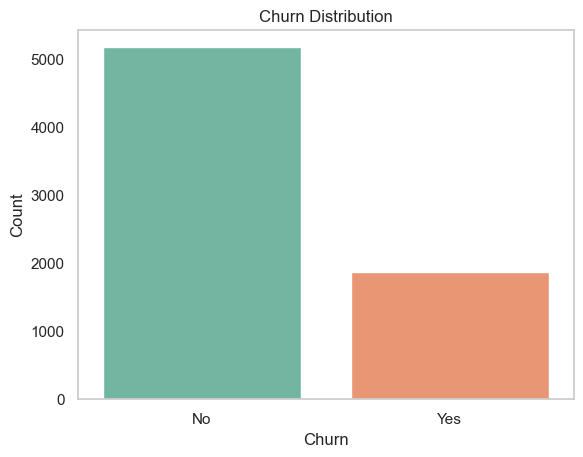

In [27]:
# Checking the target column with plot
sns.countplot(x="Churn", data=df, palette='Set2')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.grid(False)
plt.show()

In [28]:
from sklearn.preprocessing import LabelEncoder 

# Creating the Label encoder 
Label_pre = LabelEncoder() 
df_cols=df.select_dtypes(exclude=['int','float']).columns 
label_col =list(df_cols) 

# Applying encoder 
df[label_col]= df[label_col].apply(lambda col:Label_pre.fit_transform(col)) 

# Saved dataset with Label Encoder
df.to_csv("dataset_LabelEncoder.csv")

# Viewing 
Label_pre

LabelEncoder()

In [29]:
# Split the data into features (X) and target (y)
X = df.drop("Churn", axis=1) # Drop the target column to get the features
y = df["Churn"] # Set the target column

In [30]:
# Visualize rows and column x
X.shape

(7043, 18)

In [38]:
# Visualize rows and column y
y.shape

(7043,)

In [44]:
def tenure_group(t):
    if t <= 12:
        return "0–1 year"
    elif t <= 36:
        return "1–3 years"
    elif t <= 60:
        return "3–5 years"
    else:
        return "5+ years"

df["TenureCategory"] = df["tenure"].apply(tenure_group)
df["TenureCategory"] = LabelEncoder().fit_transform(df["TenureCategory"])


In [45]:
# Already encoded earlier
df["Contract"] = df["Contract"]


In [46]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize training data
print("Rows and columns of training data X_train:", X_train.shape)
print("Rows and columns of training data y_train:", X_train.shape)

Rows and columns of training data X_train: (5634, 18)
Rows and columns of training data y_train: (5634, 18)


In [47]:
df.to_csv("Cleaned_Customer_Churn_Dataset.csv", index=False)


# Step 5-Machine learning models

In [48]:
# Importing libraries
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance as plot_importance_xgb
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier, plot_importance as plot_importance_lgbm
import matplotlib.pyplot as plt
# Metrics and model evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, classification_report


# Model dictionary
models = { 
    # Logistic Regression model
    "Logistic Regression": LogisticRegression(),
    
    # Naive Bayes model
    "Naive Bayes": GaussianNB(),
       
    # Decision Tree model
    "Decision Tree Classifier": DecisionTreeClassifier (),
    # Random Forest model
    "Random Forest": RandomForestClassifier(),
    
    # AdaBoost model
    "AdaBoost": AdaBoostClassifier(),
    
    # Gradient Boosting model
    "Gradient Boosting": GradientBoostingClassifier(),
    
    # XGBoost model
    "XGBoost": XGBClassifier(),
    
    # LightGBM model
    "LightGBM": LGBMClassifier()}

# Model training with tqdm
for name, model in tqdm(models.items(), desc="Training models", total=len(models)):

    # Model training
    model.fit(X_train, y_train)

    # Model score
    score = model.score(X_test, y_test)
    
    # Model prediction
    model_pred = model.predict(X_test)
    # Displaying the models
    print()
    tqdm.write(f"Model: {name} has an Accuracy of {score:.2%}")
    

Training models:  38%|██████████████████████████████                                                  | 3/8 [00:00<00:00,  7.21it/s]


Model: Logistic Regression has an Accuracy of 81.83%

Model: Naive Bayes has an Accuracy of 75.80%

Model: Decision Tree Classifier has an Accuracy of 72.04%


Training models:  50%|████████████████████████████████████████                                        | 4/8 [00:02<00:02,  1.61it/s]


Model: Random Forest has an Accuracy of 79.21%


Training models:  62%|██████████████████████████████████████████████████                              | 5/8 [00:02<00:01,  1.66it/s]


Model: AdaBoost has an Accuracy of 79.91%


Training models:  75%|████████████████████████████████████████████████████████████                    | 6/8 [00:04<00:01,  1.11it/s]


Model: Gradient Boosting has an Accuracy of 81.05%


Training models:  88%|██████████████████████████████████████████████████████████████████████          | 7/8 [00:04<00:00,  1.34it/s]


Model: XGBoost has an Accuracy of 78.14%
[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003712 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418


Training models: 100%|████████████████████████████████████████████████████████████████████████████████| 8/8 [00:05<00:00,  1.44it/s]


Model: LightGBM has an Accuracy of 79.77%



Machine Learning Model: Logistic Regression





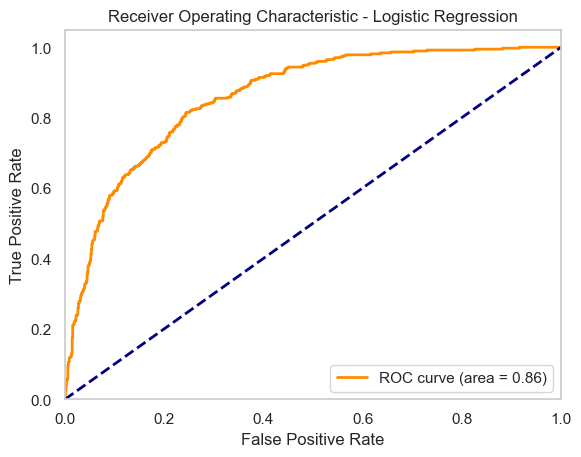



Accuracy: 0.8183108587650816




Confusion matrix 

 [[935 101]
 [155 218]]

True Positives (TP) =  935

True Negatives (TN) =  218

False Positives (FP) =  101

False Negatives (FN) =  155




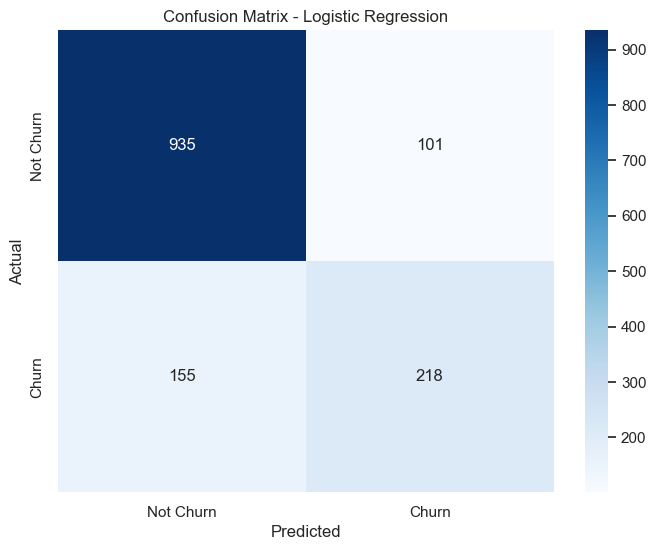



Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409


Machine Learning Model: Naive Bayes





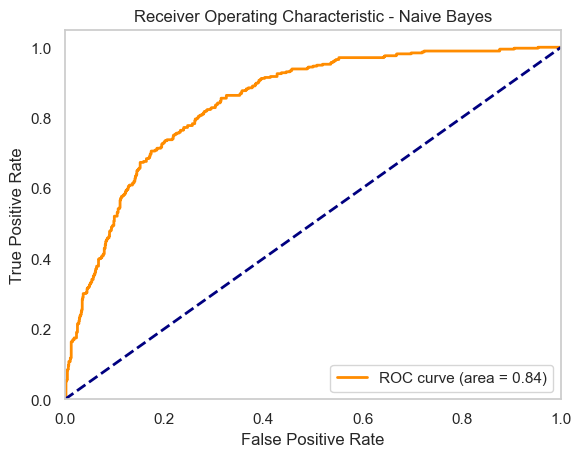



Accuracy: 0.7579843860894251




Confusion matrix 

 [[780 256]
 [ 85 288]]

True Positives (TP) =  780

True Negatives (TN) =  288

False Positives (FP) =  256

False Negatives (FN) =  85




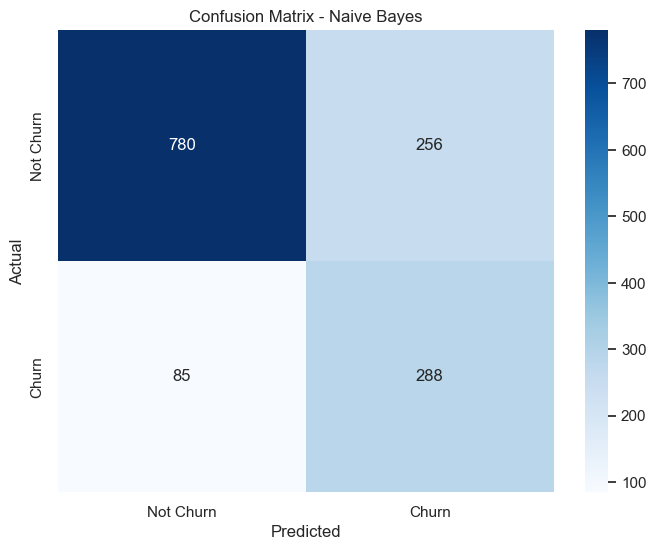



Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1036
           1       0.53      0.77      0.63       373

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.72      1409
weighted avg       0.80      0.76      0.77      1409


Machine Learning Model: Decision Tree Classifier





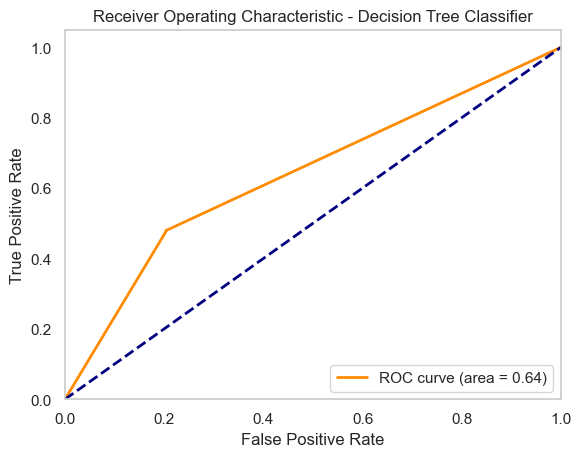



Accuracy: 0.7118523775727467




Confusion matrix 

 [[826 210]
 [196 177]]

True Positives (TP) =  826

True Negatives (TN) =  177

False Positives (FP) =  210

False Negatives (FN) =  196




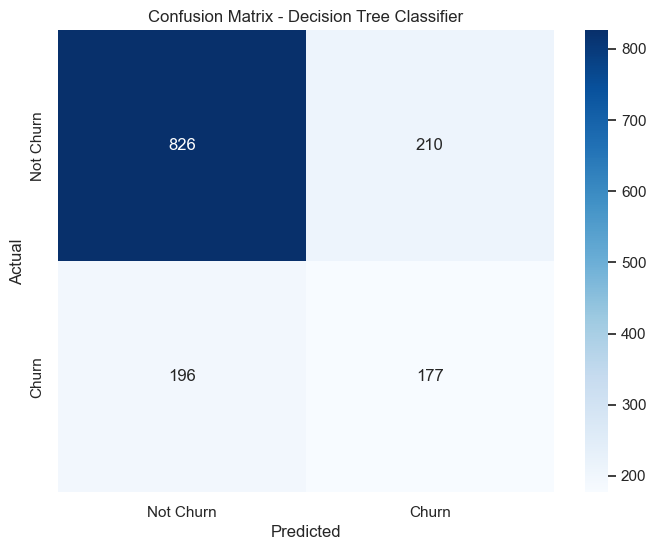



Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1036
           1       0.46      0.47      0.47       373

    accuracy                           0.71      1409
   macro avg       0.63      0.64      0.63      1409
weighted avg       0.72      0.71      0.71      1409


Machine Learning Model: Random Forest





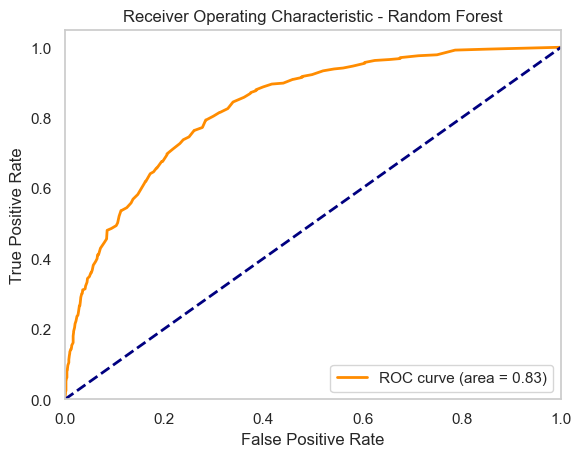



Accuracy: 0.7998580553584103




Confusion matrix 

 [[948  88]
 [194 179]]

True Positives (TP) =  948

True Negatives (TN) =  179

False Positives (FP) =  88

False Negatives (FN) =  194




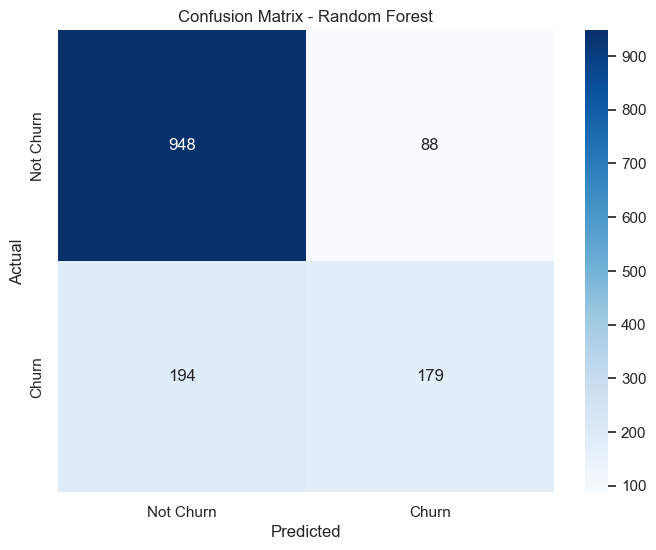



Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.67      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409


Machine Learning Model: AdaBoost





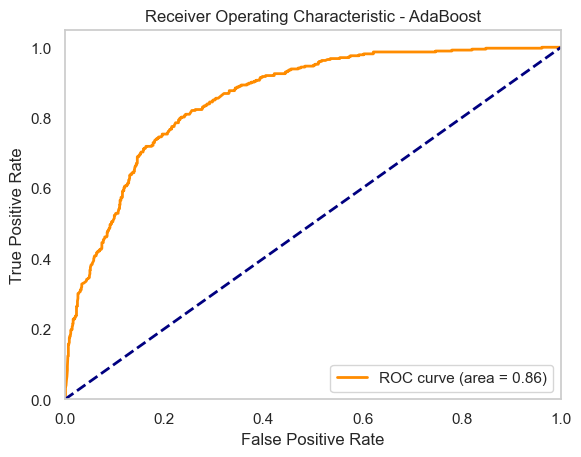



Accuracy: 0.7991483321504613




Confusion matrix 

 [[930 106]
 [177 196]]

True Positives (TP) =  930

True Negatives (TN) =  196

False Positives (FP) =  106

False Negatives (FN) =  177




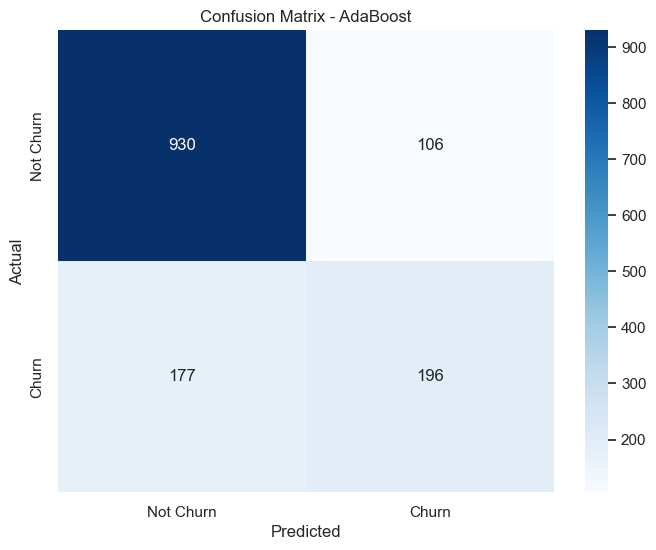



Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.65      0.53      0.58       373

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409


Machine Learning Model: Gradient Boosting





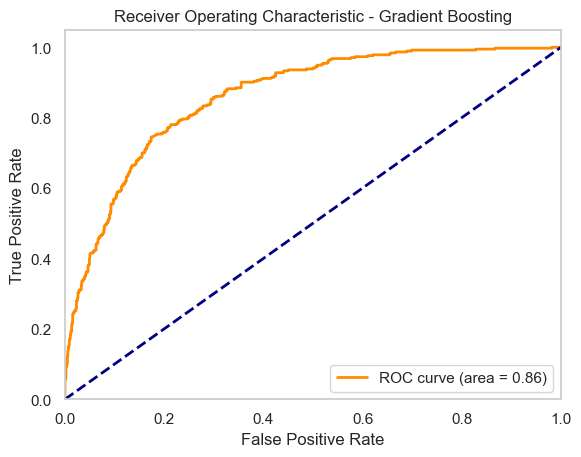



Accuracy: 0.8105039034776437




Confusion matrix 

 [[940  96]
 [171 202]]

True Positives (TP) =  940

True Negatives (TN) =  202

False Positives (FP) =  96

False Negatives (FN) =  171




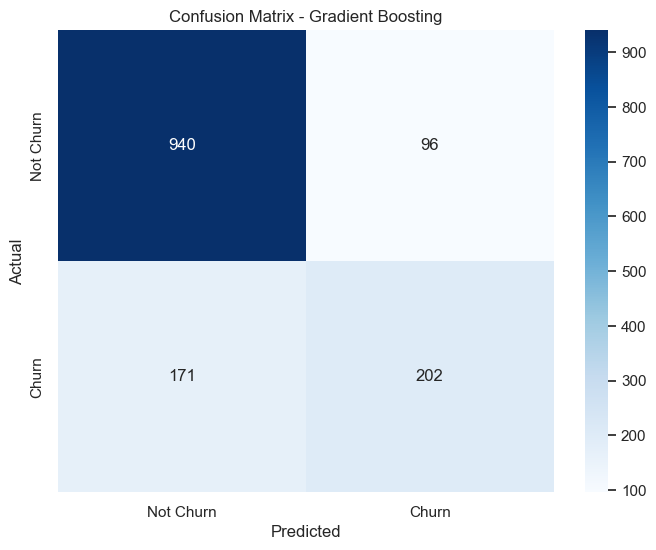



Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409


Machine Learning Model: XGBoost





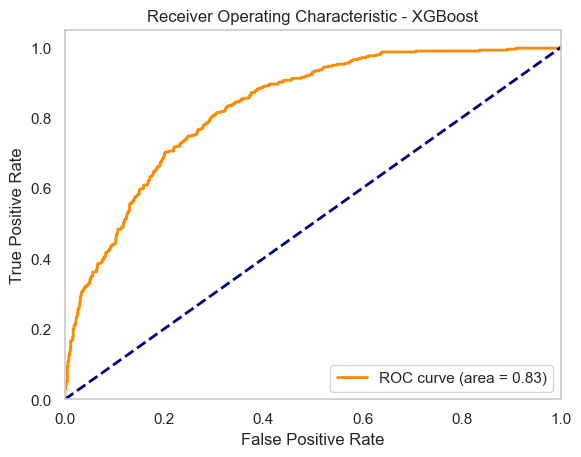



Accuracy: 0.7814052519517388




Confusion matrix 

 [[911 125]
 [183 190]]

True Positives (TP) =  911

True Negatives (TN) =  190

False Positives (FP) =  125

False Negatives (FN) =  183




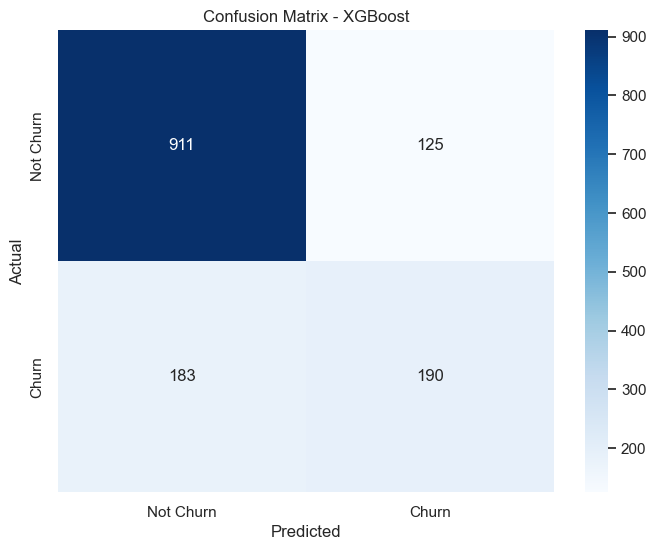



Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1036
           1       0.60      0.51      0.55       373

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.78      1409

[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000768 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418

Machine Learning Model: LightGBM





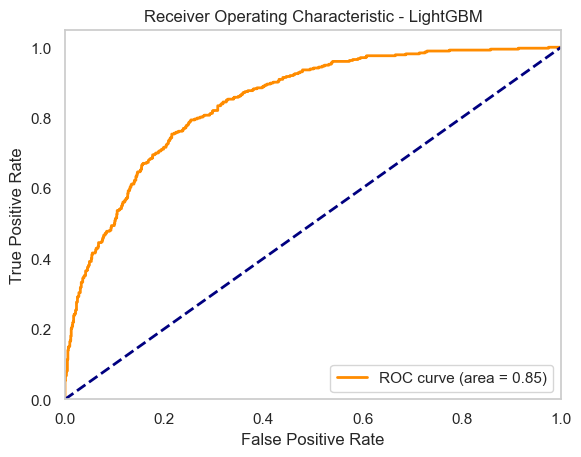



Accuracy: 0.7977288857345636




Confusion matrix 

 [[924 112]
 [173 200]]

True Positives (TP) =  924

True Negatives (TN) =  200

False Positives (FP) =  112

False Negatives (FN) =  173




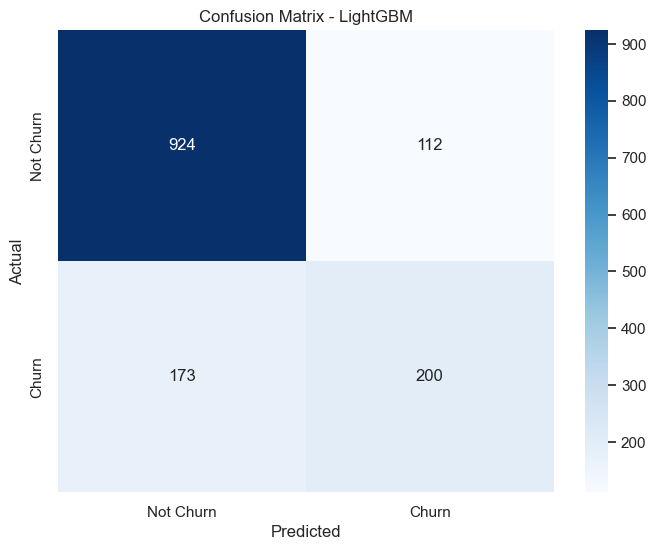



Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1036
           1       0.64      0.54      0.58       373

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [49]:
# Iterating over each model
for name, model in models.items():

    # Training the model
    model.fit(X_train, y_train)

    # Prediction on the test set
    y_pred = model.predict(X_test)

    print()
    print("Machine Learning Model:", name)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)
    print()
    print()

    # Plotting the ROC curve
    print()
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - {}'.format(name))
    plt.legend(loc="lower right")
    plt.grid(False)
    plt.show()
    print()
    print()
     # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)
    print()
    print()

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print()
    print()
    print('Confusion matrix \n\n', cm)
    print('\nTrue Positives (TP) = ', cm[0,0])
    print('\nTrue Negatives (TN) = ', cm[1,1])
    print('\nFalse Positives (FP) = ', cm[0,1])
    print('\nFalse Negatives (FN) = ', cm[1,0])
    print()
    print()
    # Plotting the confusion matrix with Seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - {}'.format(name))
    plt.xlabel('Predicted')
    plt.ylabel('Actual') 
    plt.xticks(ticks=[0.5, 1.5], labels=['Not Churn', 'Churn'])
    plt.yticks(ticks=[0.5, 1.5], labels=['Not Churn', 'Churn'])
    plt.show()
    print()
    print()
# Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    


# Feature Importance - Interpreting model results with SHAP values

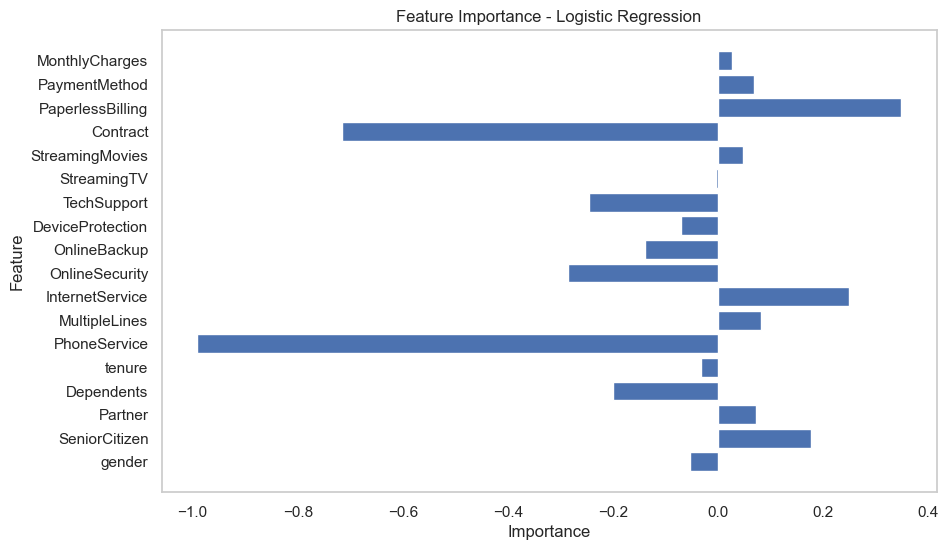

The model Naive Bayes does not support feature importance extraction.


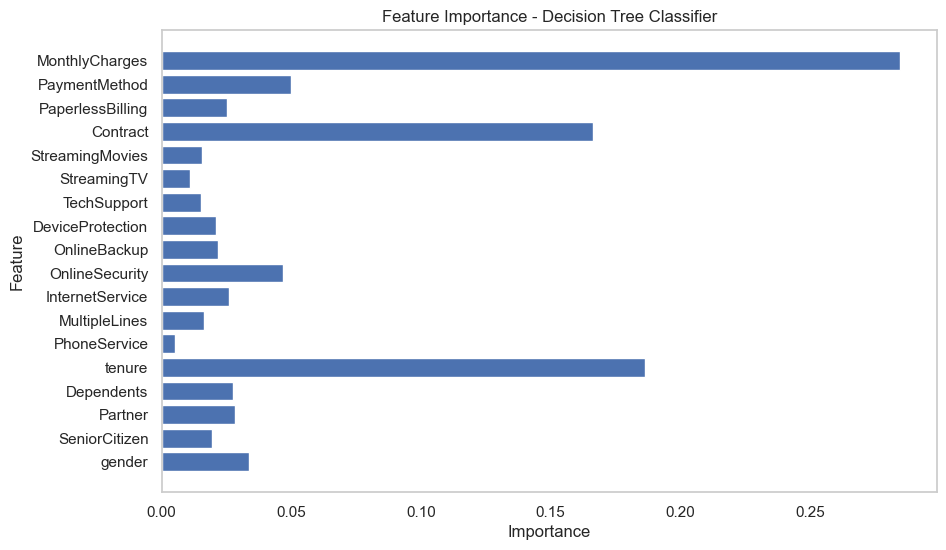

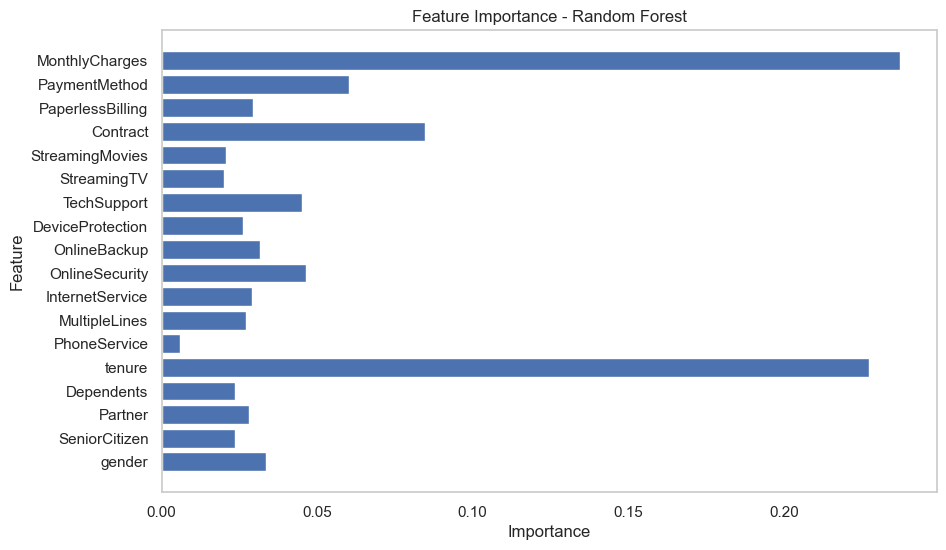

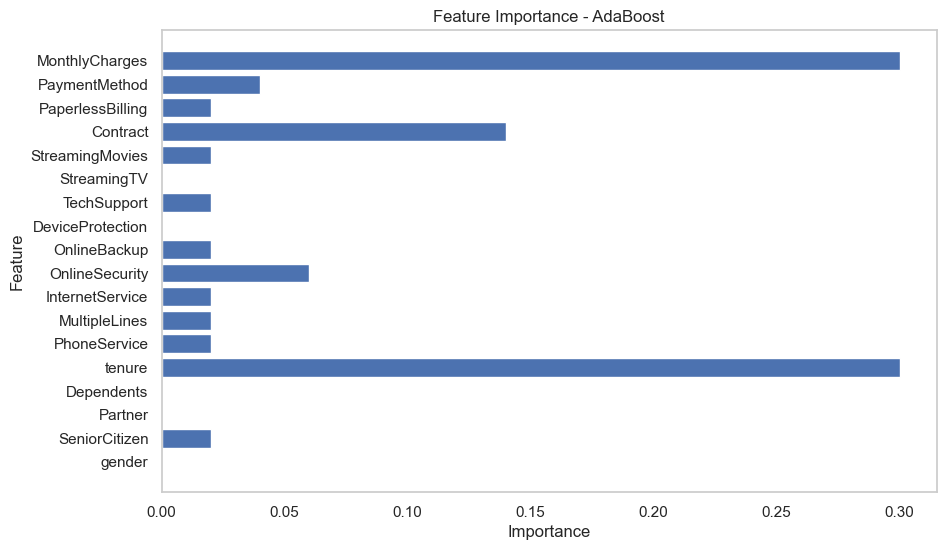

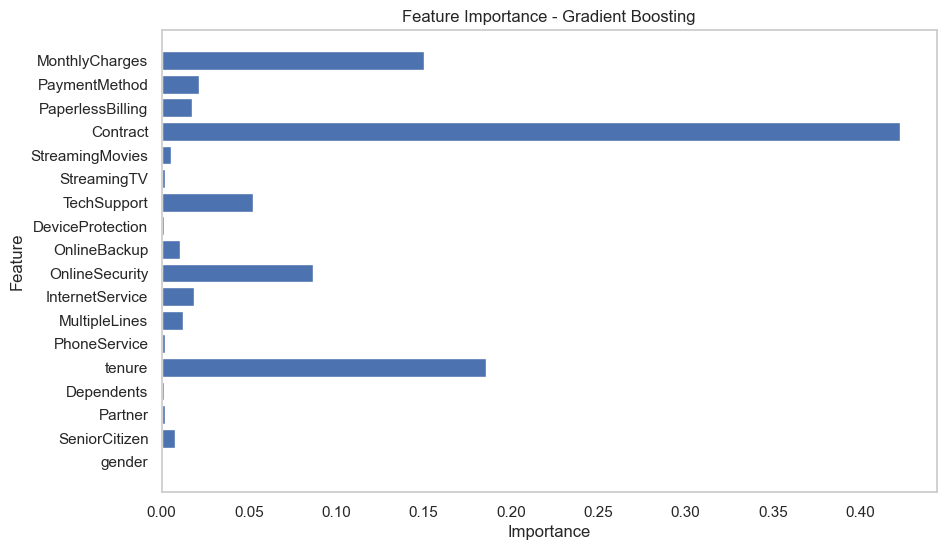

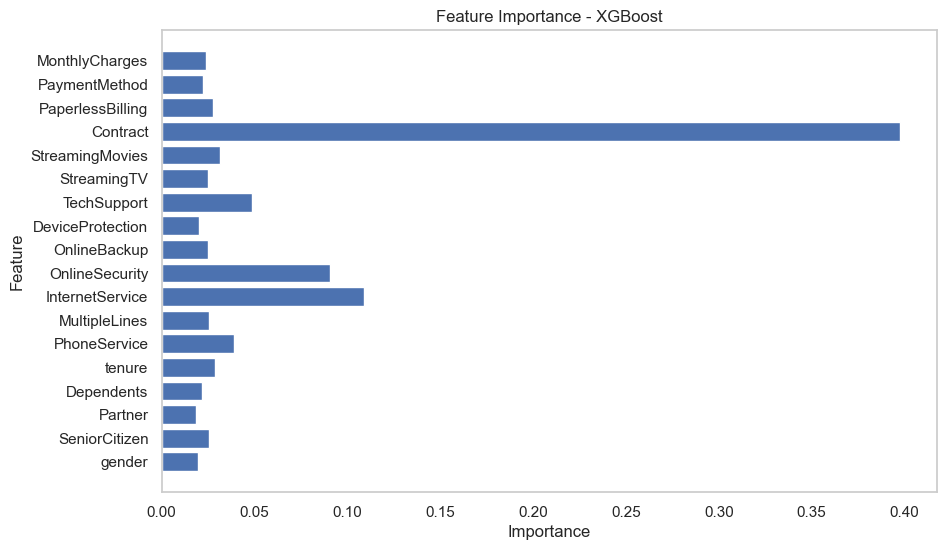

[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000780 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418


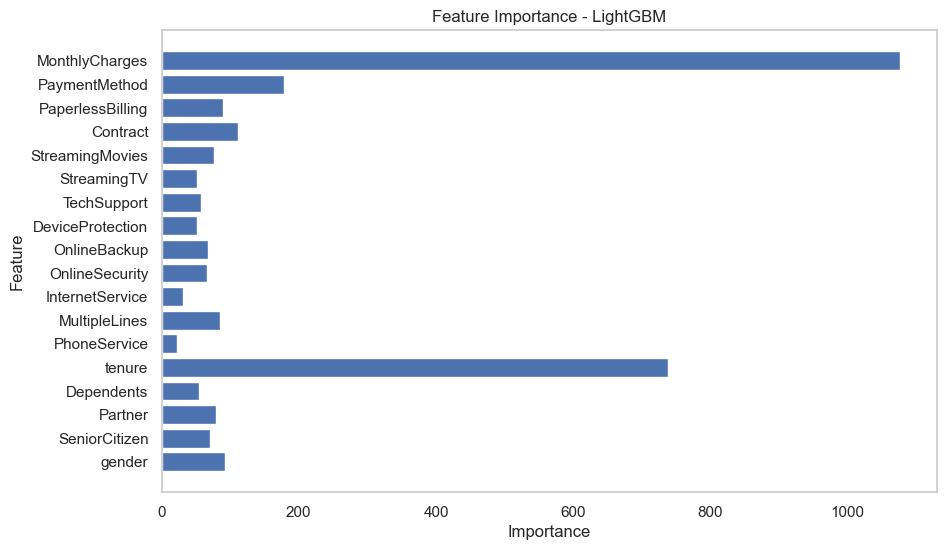

In [46]:
# Training the models and obtaining their feature importances
for model_name, model in models.items():
    model.fit(X_train, y_train)
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        feature_importances = model.coef_[0]
    else:
        feature_importances = None

    if feature_importances is not None:
        # Plotting feature importances
        plt.figure(figsize=(10, 6))
        plt.barh(range(len(feature_importances)), feature_importances)
        plt.title(f"Feature Importance - {model_name}")
        plt.ylabel("Feature")
        plt.xlabel("Importance")
        plt.grid(False)
        plt.yticks(range(len(feature_importances)), X_train.columns) # Assuming X_train is a pandas DataFrame
        plt.show()
    else:
        print(f"The model {model_name} does not support feature importance extraction.")
        

Model: Logistic Regression


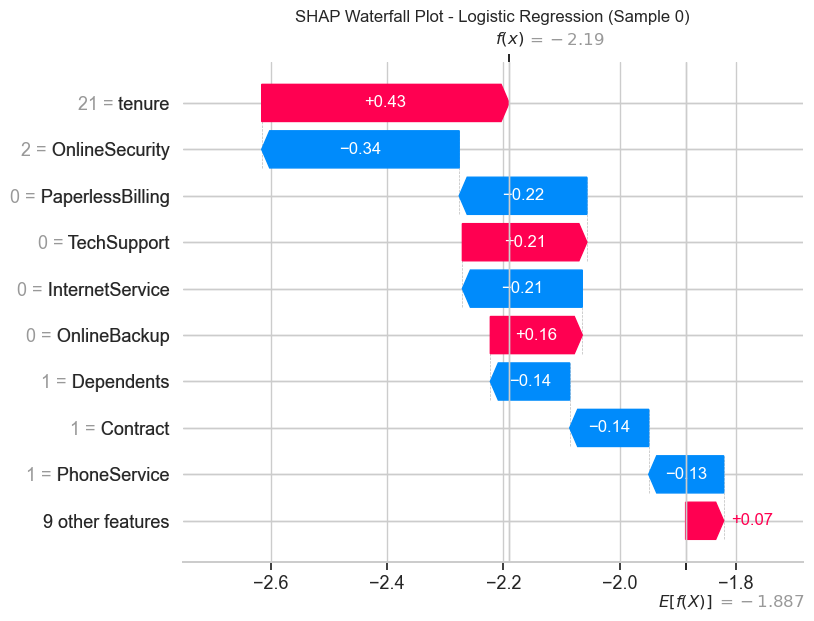

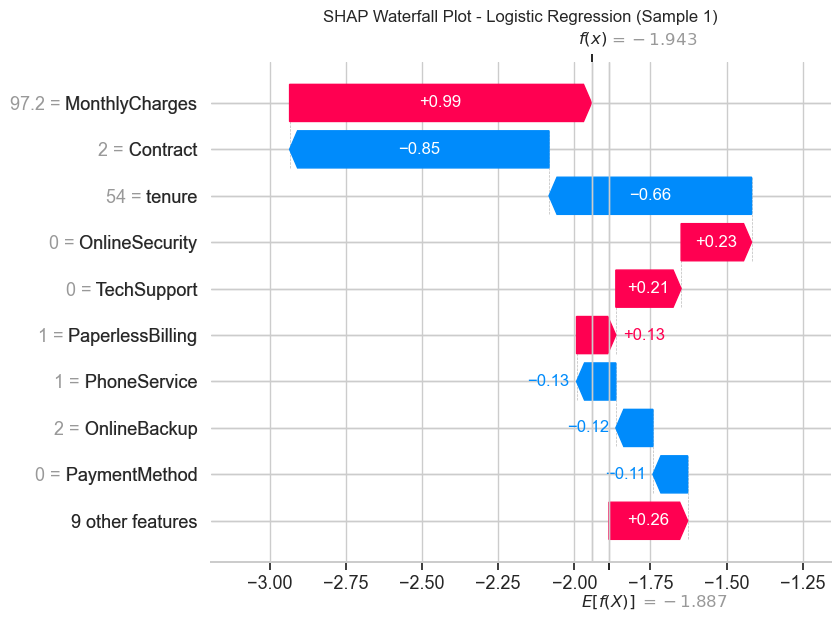

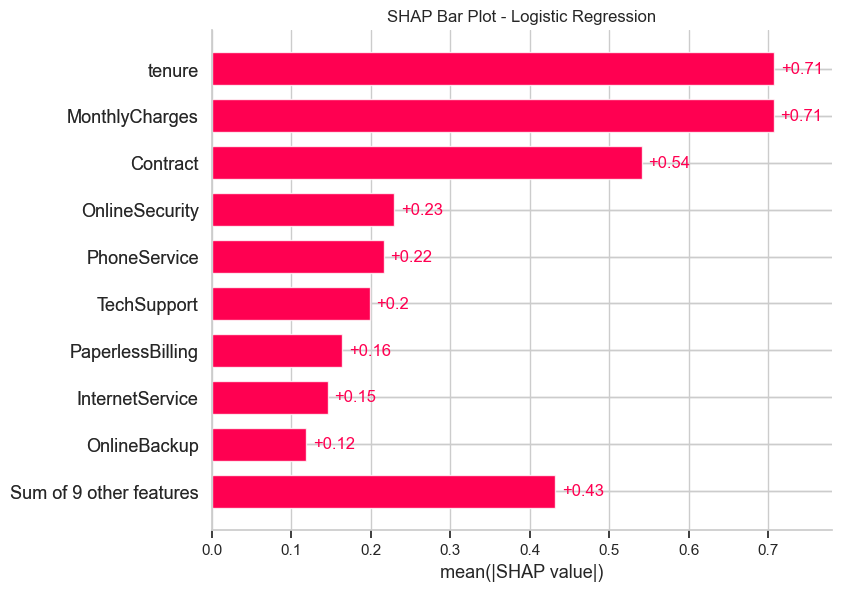

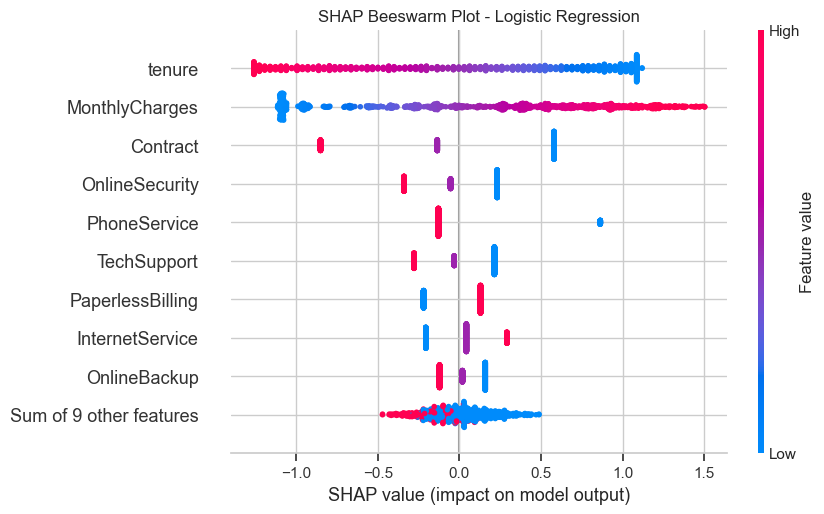

The model Naive Bayes is not compatible with SHAP: The passed model is not callable and cannot be analyzed directly with the given masker! Model: GaussianNB()
Model: Decision Tree Classifier
The model Decision Tree Classifier is not compatible with SHAP: The waterfall plot can currently only plot a single explanation, but a matrix of explanations (shape (18, 2)) was passed! Perhaps try `shap.plots.waterfall(shap_values[0])` or for multi-output models, try `shap.plots.waterfall(shap_values[0, 0])`.


100%|===================| 1993/2000 [03:29<00:00]        

The model Random Forest is not compatible with SHAP: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 0.979900, while the model output was 0.960000. If this difference is acceptable you can set check_additivity=False to disable this check.
The model AdaBoost is not compatible with SHAP: The passed model is not callable and cannot be analyzed directly with the given masker! Model: AdaBoostClassifier()
Model: Gradient Boosting


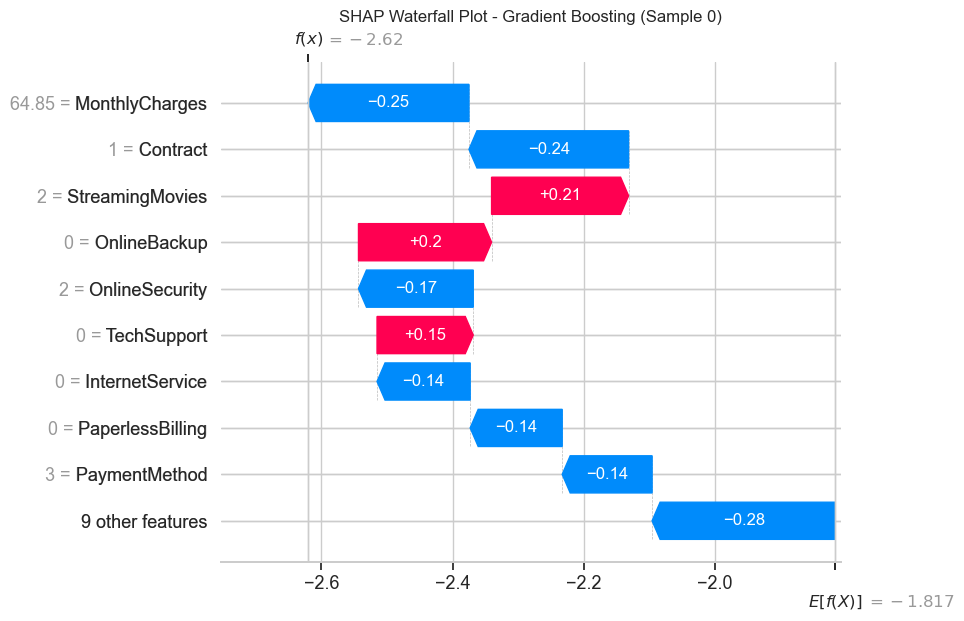

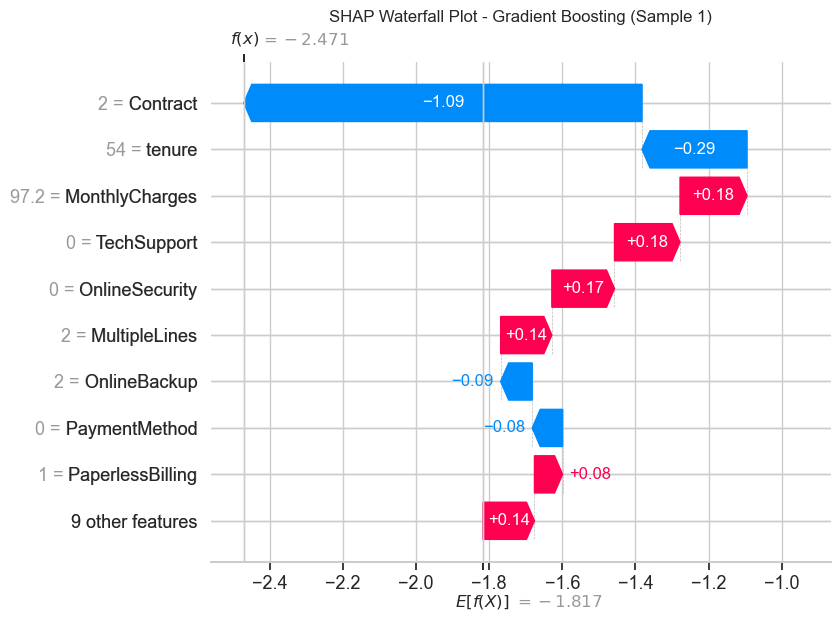

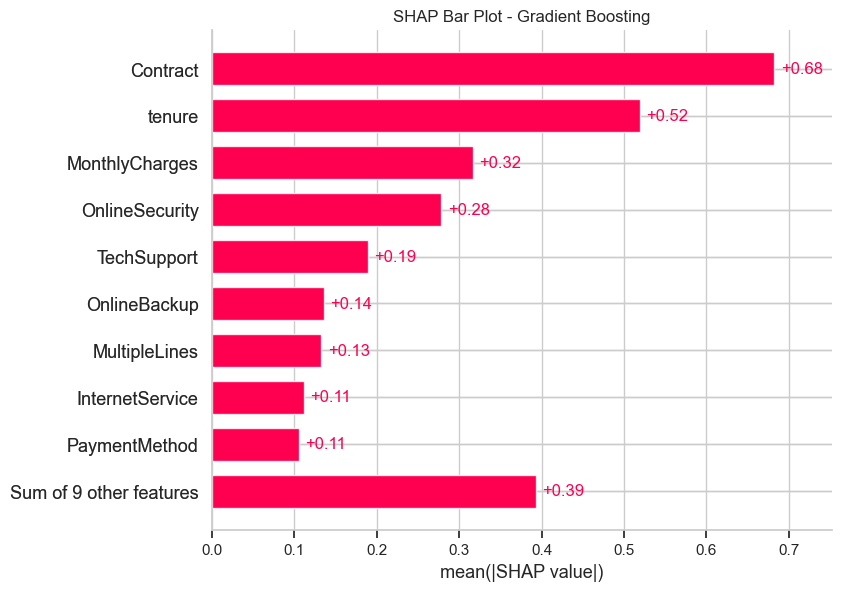

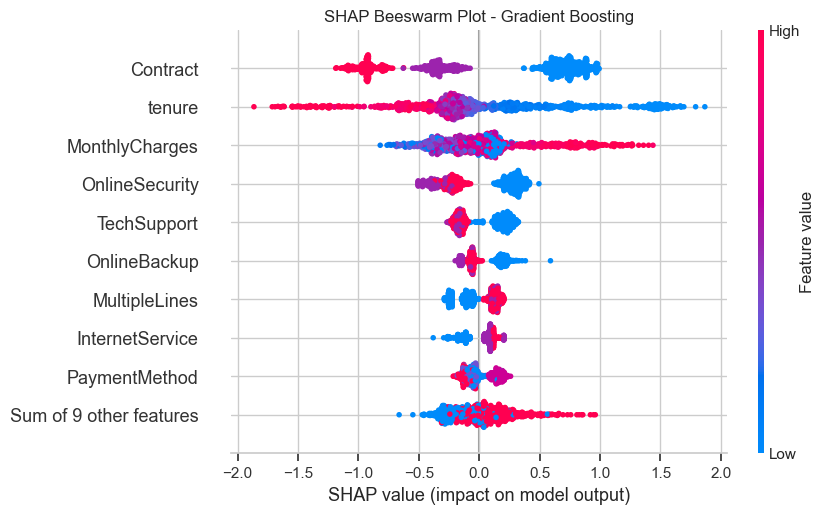

The model XGBoost is not compatible with SHAP: The passed model is not callable and cannot be analyzed directly with the given masker! Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)
Model: LightGBM


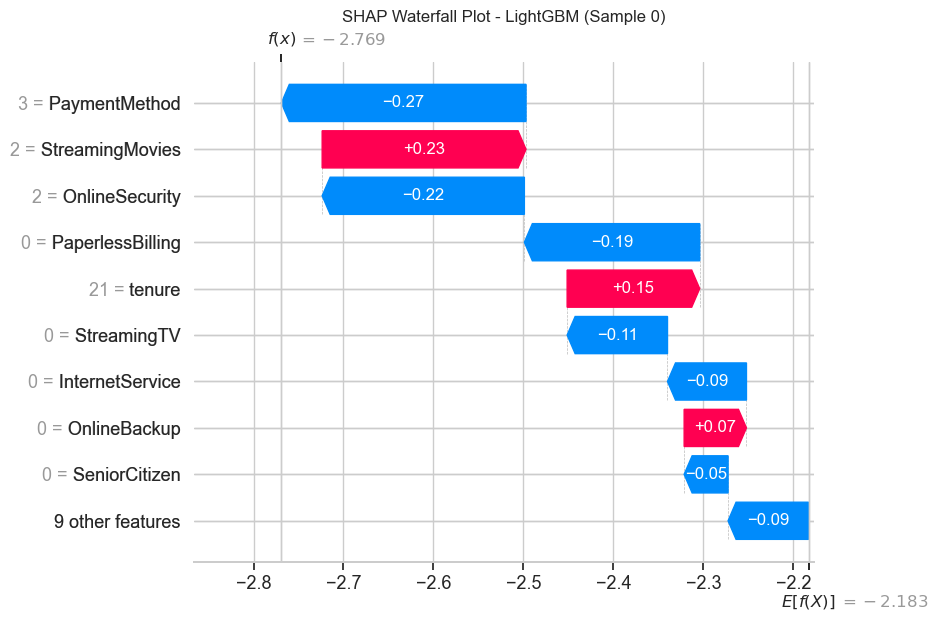

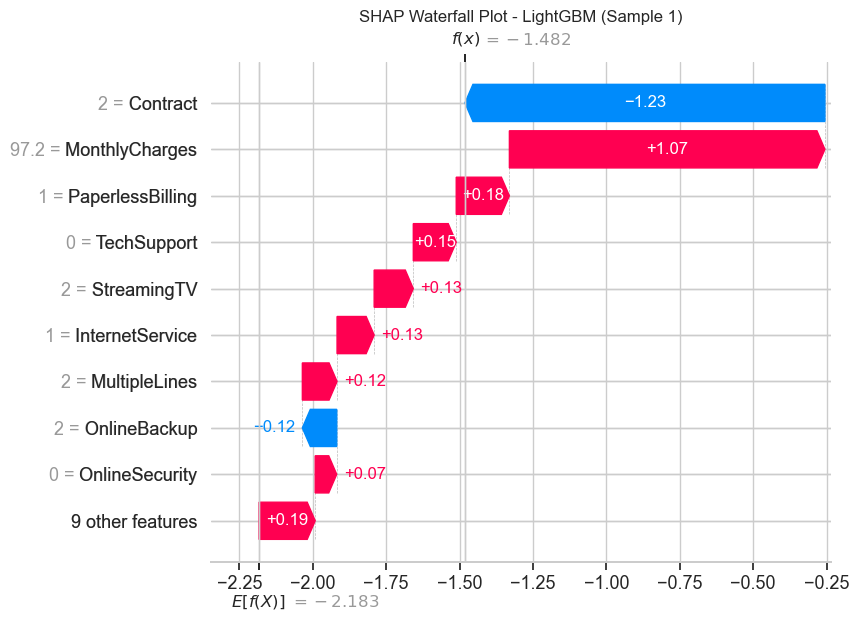

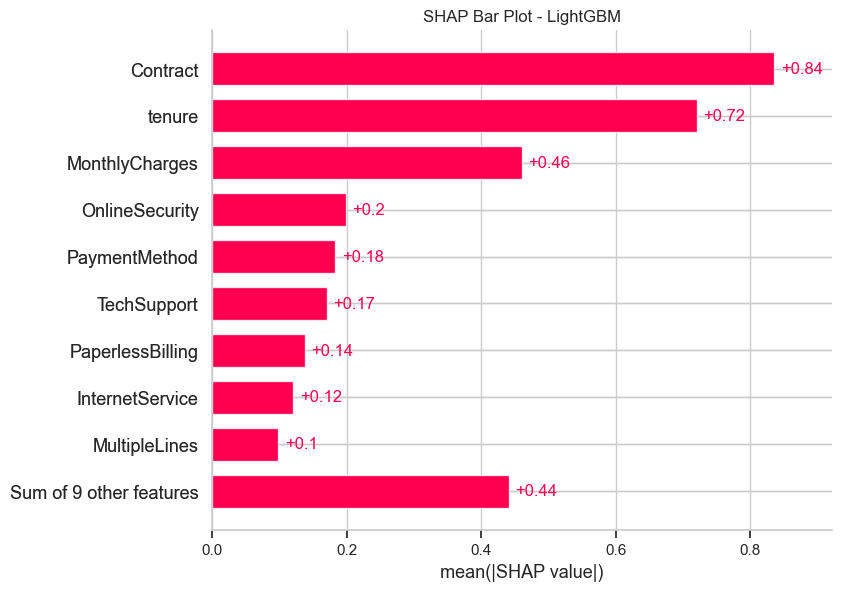

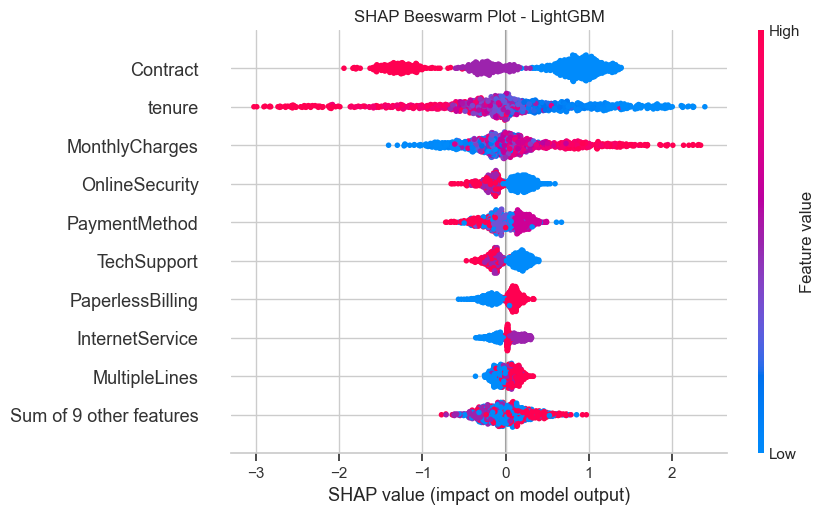

In [47]:
import shap

# Creating an explainer object and calculating SHAP values for each model
for model_name, model in models.items():
    # Check if the model is compatible with SHAP
    try:
        explainer = shap.Explainer(model, X_train)
        shap_values = explainer(X_train[:1000])
        
        # Generate SHAP plots
        print(f"Model: {model_name}")
        
        # Waterfall plot for the first sample
        shap.plots.waterfall(shap_values[0], show=False)
        plt.title(f"SHAP Waterfall Plot - {model_name} (Sample 0)")
        plt.show()
        
        # Waterfall plot for the second sample
        shap.plots.waterfall(shap_values[1], show=False)
        plt.title(f"SHAP Waterfall Plot - {model_name} (Sample 1)")
        plt.show()
        
        # Bar plot for mean SHAP values
        shap.plots.bar(shap_values, show=False)
        plt.title(f"SHAP Bar Plot - {model_name}")
        plt.show()
        
        # Beeswarm plot to visualize SHAP value distribution
        shap.plots.beeswarm(shap_values, show=False)
        plt.title(f"SHAP Beeswarm Plot - {model_name}")
        plt.show()
        
    except Exception as e:
        print(f"The model {model_name} is not compatible with SHAP: {e}")

In [51]:
# Dictionary to store metrics
metrics_results = {'Model': [],
                   'Accuracy': [],
                   'Precision': [],
                   'Recall': [],
                   'F1-Score': [],
                   'Support': []
                  }

# Iterating over each model
for name, model in models.items():
    
    # Training the model
    model.fit(X_train, y_train)
# Prediction on the test set
    y_pred = model.predict(X_test)

    # Calculating accuracy
    acc = accuracy_score(y_test, y_pred)
    
    # Calculating other metrics using classification_report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Storing accuracy and other metrics results in the dictionary
    metrics_results['Model'].append(name)
    metrics_results['Accuracy'].append(acc)
    metrics_results['Precision'].append(report['weighted avg']['precision'])
    metrics_results['Recall'].append(report['weighted avg']['recall'])
    metrics_results['F1-Score'].append(report['weighted avg']['f1-score'])
    metrics_results['Support'].append(report['weighted avg']['support'])

# Creating DataFrame with the results
df_metrics = pd.DataFrame(metrics_results)
# Displaying the DataFrame sorted by the accuracy column in descending order
df_metrics_sorted = df_metrics.sort_values(by='Accuracy', ascending=False)
df_metrics_sorted.head()


[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000596 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418


,Model,Accuracy,Precision,Recall,F1-Score,Support
0,Logistic Regression,0.818311,0.811626,0.818311,0.813529,1409.0
5,Gradient Boosting,0.810504,0.801549,0.810504,0.803223,1409.0
4,AdaBoost,0.799148,0.789519,0.799148,0.791912,1409.0
7,LightGBM,0.797729,0.789015,0.797729,0.791615,1409.0
3,Random Forest,0.797019,0.784091,0.797019,0.783418,1409.0


In [52]:
# Importing libraries
from tqdm import tqdm
import pickle

# Directory to save the models
models_dir = "ML_Churn_Prediction/models/models"

# Create the folder if it does not exist
os.makedirs(models_dir, exist_ok=True)

# Dictionary of models
models = {
    
    # Logistic Regression model
    "Logistic Regression": LogisticRegression(),
    
    # Naive Bayes model
    "Naive Bayes": GaussianNB(),
         
    # Decision Tree model
    "Decision Tree Classifier": DecisionTreeClassifier(),
         
    # Random Forest model
"Random Forest": RandomForestClassifier(),
            
    # AdaBoost model
    "AdaBoost": AdaBoostClassifier(),
           
    # Gradient Boosting model
    "Gradient Boosting": GradientBoostingClassifier(),
            
     # XGBoost model
    "XGBoost": XGBClassifier(),
            
    # LightGBM model
    "LightGBM": LGBMClassifier()
}

# Training models with tqdm
for name, model in tqdm(models.items(), desc="Training models", total=len(models)):

    # Training the model
    model.fit(X_train, y_train)

    # Model score
    score = model.score(X_test, y_test)
    
    # Save the trained model with pickle
    model_path = os.path.join(models_dir, f"{name}_model.pkl")
    with open(model_path, 'wb') as file:
        pickle.dump(model, file)
    
    # Model prediction
    model_pred = model.predict(X_test)

    # Displaying the models
    print()
    tqdm.write(f"Model: {name} has Accuracy {score:.2%} and was saved as {model_path}")

Training models:  38%|██████████████████████████████                                                  | 3/8 [00:00<00:00,  9.24it/s]


Model: Logistic Regression has Accuracy 81.83% and was saved as ML_Churn_Prediction/models/models\Logistic Regression_model.pkl

Model: Naive Bayes has Accuracy 75.80% and was saved as ML_Churn_Prediction/models/models\Naive Bayes_model.pkl

Model: Decision Tree Classifier has Accuracy 70.48% and was saved as ML_Churn_Prediction/models/models\Decision Tree Classifier_model.pkl


Training models:  38%|██████████████████████████████                                                  | 3/8 [00:02<00:00,  9.24it/s]


Model: Random Forest has Accuracy 79.13% and was saved as ML_Churn_Prediction/models/models\Random Forest_model.pkl


Training models:  62%|██████████████████████████████████████████████████                              | 5/8 [00:03<00:02,  1.29it/s]


Model: AdaBoost has Accuracy 79.91% and was saved as ML_Churn_Prediction/models/models\AdaBoost_model.pkl


Training models:  75%|████████████████████████████████████████████████████████████                    | 6/8 [00:05<00:02,  1.14s/it]


Model: Gradient Boosting has Accuracy 81.05% and was saved as ML_Churn_Prediction/models/models\Gradient Boosting_model.pkl


Training models:  88%|██████████████████████████████████████████████████████████████████████          | 7/8 [00:05<00:00,  1.09it/s]


Model: XGBoost has Accuracy 78.14% and was saved as ML_Churn_Prediction/models/models\XGBoost_model.pkl
[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000675 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418


Training models: 100%|████████████████████████████████████████████████████████████████████████████████| 8/8 [00:05<00:00,  1.34it/s]


Model: LightGBM has Accuracy 79.77% and was saved as ML_Churn_Prediction/models/models\LightGBM_model.pkl
